In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("C:/Users/Veli/Desktop/projeler/BitirmeProjesiSon")


In [3]:
#verimize bakalım
data = pd.read_csv('thyroidDF.csv')
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
# burada da verilerimiz hakkında info metodu ile bilgi alıyoruz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [5]:
# burada ki veri setimizde patiend_id ve referans_source biizm için bir şey ifade etmeyeceği için onları siliyoruz
data = data.drop(['patient_id', 'referral_source'], axis=1)

In [6]:
# burada target değişkenimizde veriler çok çeşiştli olduğundan dolayı bunların düzenlemesini yapıyoruz 
mapping = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }
data['target'] = data['target'].map(mapping)

In [7]:
# targer değişkenimizde ki verilerimzin hanginsden ne kadar olduğuna bakalım
data["target"].value_counts()

target
Negative        6771
Hypothyroid      667
Hyperthyroid     241
Name: count, dtype: int64

In [8]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,f,NaN,Negative
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,NaN,Negative
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,11.0,Negative
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26.0,Negative
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36.0,NaN


In [9]:
# burada tüm değişkenlerimizin verinin kategorik mi yoksa sürekli bir değişken olup olmadığını kontrol ediyoruz
def editingDtype(data):
    for i in data.columns:
        # burada kategorik değişkenlerimizi kontrol ediyoruz bunun için ise 4 tane nunqiue değerimiz varsa kategorik değişken olarak kabul ediyoruz 
        if data[i].nunique() < 5:
            data[i] = data[i].astype('category')
        else:
            data[i] = data[i].astype('float64')

In [10]:
# yazdığımız fonksiyon yardımı ile verilerimizin tiplerini dönüştürüyoruz
editingDtype(data)

In [11]:
data.dtypes

age                     float64
sex                    category
on_thyroxine           category
query_on_thyroxine     category
on_antithyroid_meds    category
sick                   category
pregnant               category
thyroid_surgery        category
I131_treatment         category
query_hypothyroid      category
query_hyperthyroid     category
lithium                category
goitre                 category
tumor                  category
hypopituitary          category
psych                  category
TSH_measured           category
TSH                     float64
T3_measured            category
T3                      float64
TT4_measured           category
TT4                     float64
T4U_measured           category
T4U                     float64
FTI_measured           category
FTI                     float64
TBG_measured           category
TBG                     float64
target                 category
dtype: object

In [12]:
# burada target değişkenine etkisi bulunan değişkenlerimizi atmak için bir liste oluşturuyoruz
relational = list()

In [13]:
def descriptiveStatistics(data, feautue):
    dataDtype = data[feautue].dtype
    print("Değişkenimizin Açıklayıvıc İstatistikleri:")
    print(data[feautue].describe())
    if dataDtype == 'category':
        print("\n")
        print("Değişkenimizin Sınıf Frekansları:")
        print(data[feautue].value_counts())
    
    print("\n")
    print("Değişkenimizde ki toplam eksik değerler: ")
    print(data[feautue].isna().sum())
    

In [14]:
def dataVisualization(data, feature):
    dataDtype = data[feature].dtype
    if feature == "target":
        print("Target değişkeninin dağılımı")
        plt.figure(figsize=(8,8))
        data[feature].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title("Target Değişkeninin Dağılımı")
        plt.show()
        print(data[feature].value_counts())
        return
    
    if dataDtype == "category":
        plt.figure(figsize=(8,8))
        data[feature].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(feature + " Değişkeninin Pasta Grafiği")
        plt.show()
        # ********************
        print("\n")
        print(feature, " Değişkenin Target değişkenine göre grublanmış grafiği")
        plt.figure(figsize=(8,8))
        sns.countplot(x=feature, hue="target", data=data, palette="viridis")
        plt.title(feature + " Değişkenin Target değişkenine göre gruplanmış grafiği")
        plt.show()

        print("\n")
        print(data.groupby(feature)["target"].value_counts())

    else:
        plt.figure(figsize=(10,6))
        sns.histplot(data[feature], kde=True)
        plt.title(feature + " Değişkeninin Dağılım Grafiği")
        plt.show()
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(y = data[feature])
        plt.title(feature + " Değişkeninin Kutu Grafiği")
        plt.show()
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="target", y=feature, data=data)
        plt.title(feature + " Değişkeninin Target değişkenine göre gruplanmış kutu grafiği")
        plt.show()

        

In [15]:
def statisticalTest(data, feature):
    from scipy.stats import chi2_contingency
    from scipy.stats import f_oneway
    dataDtype = data[feature].dtype
    mapping = {'Negative':0, 'Hypothyroid':1, 'Hyperthyroid':2}
    target = data['target'].map(mapping)
    if dataDtype == "category":
        test = chi2_contingency(pd.crosstab(data[feature], target))
        print("Ki-Kare Testi Sonuçları: ")
        print("Ki-Kare Değeri: ", test[0])
        print("P-Value Değeri: ", test[1])
        print("Serbestlik Derecesi: ", test[2])
        print("Beklenen Frekanslar: ")
        print(test[3])
        if test[1] < 0.05:
            print(feature, "Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır")
            relational.append(feature)
        else:
            print(feature, "Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki yoktur")
    else:
        f_stat, p_value = f_oneway(data[feature][target == 0], data[feature][target == 1], data[feature][target == 2])
        print("Anova Testi Sonuçları: ")
        print("F-Stat Değeri: ", f_stat)
        print("P-Value Değeri: ", p_value)
        if p_value < 0.05:
            print(feature, "Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır")
            relational.append(feature)
        else:
            print(feature, "Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki yoktur")
            

### TARGET

In [16]:
descriptiveStatistics(data,"target")

Değişkenimizin Açıklayıvıc İstatistikleri:
count         7679
unique           3
top       Negative
freq          6771
Name: target, dtype: object


Değişkenimizin Sınıf Frekansları:
target
Negative        6771
Hypothyroid      667
Hyperthyroid     241
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
1493


görüldüğü üzere target değişkenimizde 3 seviye var ve toplamda 1493 tane de eksik değişkenimiz var. Şimdi de görselleştirelim

Target değişkeninin dağılımı


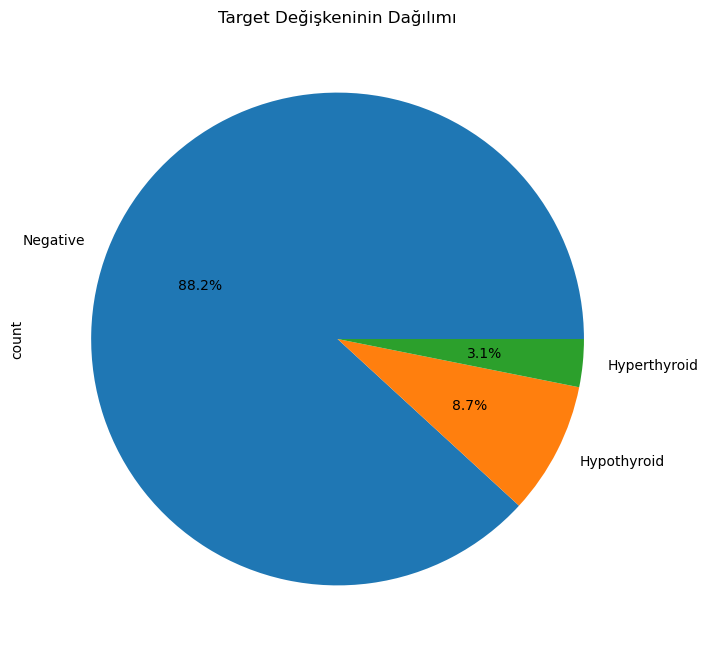

target
Negative        6771
Hypothyroid      667
Hyperthyroid     241
Name: count, dtype: int64


In [17]:
dataVisualization(data, "target")

Baktığımızda en fazla olan sınıfımız 0 sınıfı ondan sonra ki 2 sınıfımız ve en az olan ise 1 sınıfımız 

### AGE

In [18]:
descriptiveStatistics(data, "age")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9172.000000
mean        73.555822
std       1183.976718
min          1.000000
25%         37.000000
50%         55.000000
75%         68.000000
max      65526.000000
Name: age, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
0


Age değişkenimizde eksik değer yok ama baktığımızda 65526 değerine sahip (aykırı değer oluyor burada) verimiz var, şimdi age değişkenimizi 100'den küçük şekilde ayarlayalım

In [19]:
data = data[data["age"] < 100]

In [20]:
# tekrardan bir göz gezdirelim
descriptiveStatistics(data, "age")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    9168.000000
mean       52.099695
std        18.910296
min         1.000000
25%        37.000000
50%        55.000000
75%        67.000000
max        97.000000
Name: age, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
0


Görüldüğ üzere verimiz düzenlendi şimdi de görselleştirerek daha anlaşılır hale getirelim

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


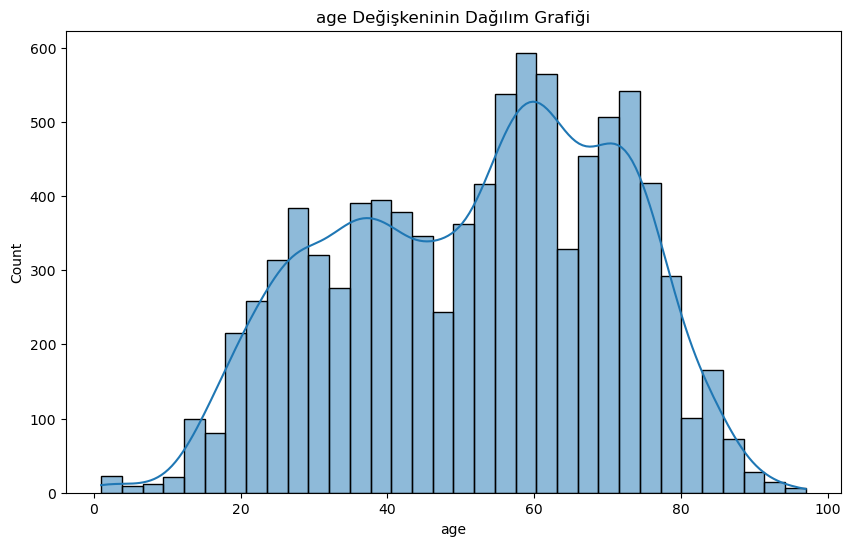

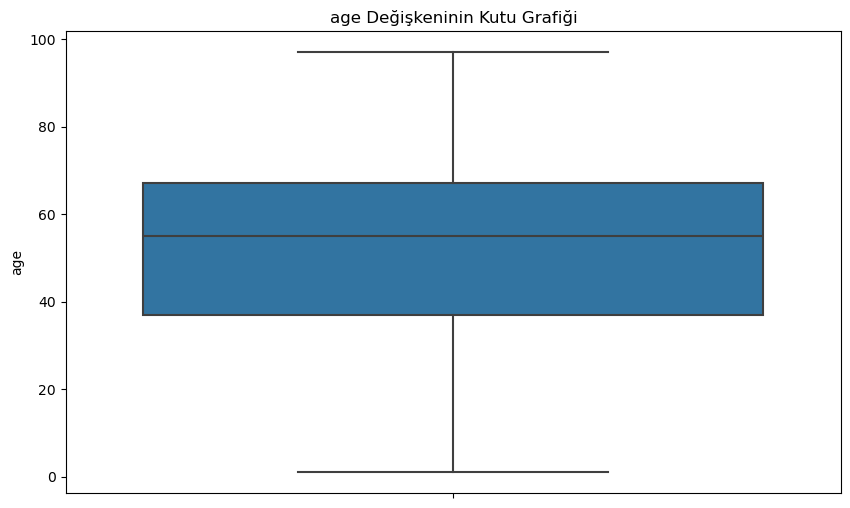

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


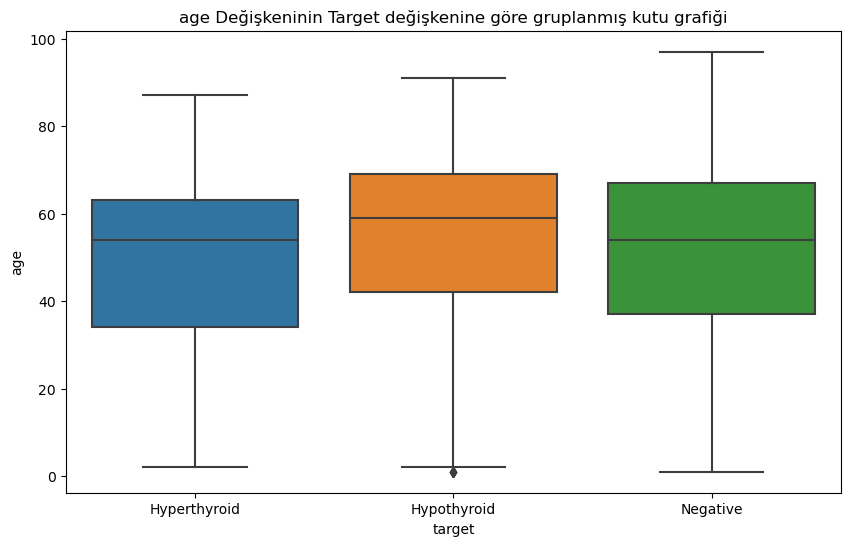

In [21]:
dataVisualization(data, "age")

görüldüğü üzere hasta olmayan ve hipertiroid hastalarının yaş ortalamaları birbirine yakınken, hiptiroid hastaları'nın yaş ortalamaları daha yüksekte
Şimdi de istatistiksel olarak testimizi gerçekleştirelim

In [22]:
statisticalTest(data,"age")

Anova Testi Sonuçları: 
F-Stat Değeri:  11.244505192156312
P-Value Değeri:  1.3295874449168426e-05
age Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


Anlamlı bir ilişki ortaya çıktığını gördük, bu yüzden kodlarımızın başında oluşturduğumuz relational adlı listemize atacağız, bu listeyi makine öğrenmesini gerçekleştirirken kullanacağız

## on_thyroxine

In [23]:
descriptiveStatistics(data, "on_thyroxine")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      7928
Name: on_thyroxine, dtype: object


Değişkenimizin Sınıf Frekansları:
on_thyroxine
f    7928
t    1240
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


on_thyroxine değişkenimizde ise 2 seviyeli bir kategorik değişkenimiz f ve t (false/true) değişkenimiz var ve hiç eksik değerimiz yok

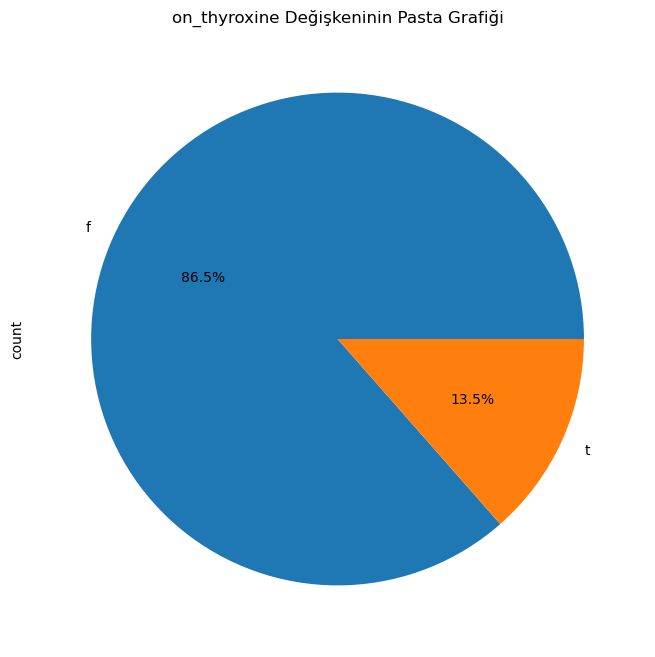



on_thyroxine  Değişkenin Target değişkenine göre grublanmış grafiği


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


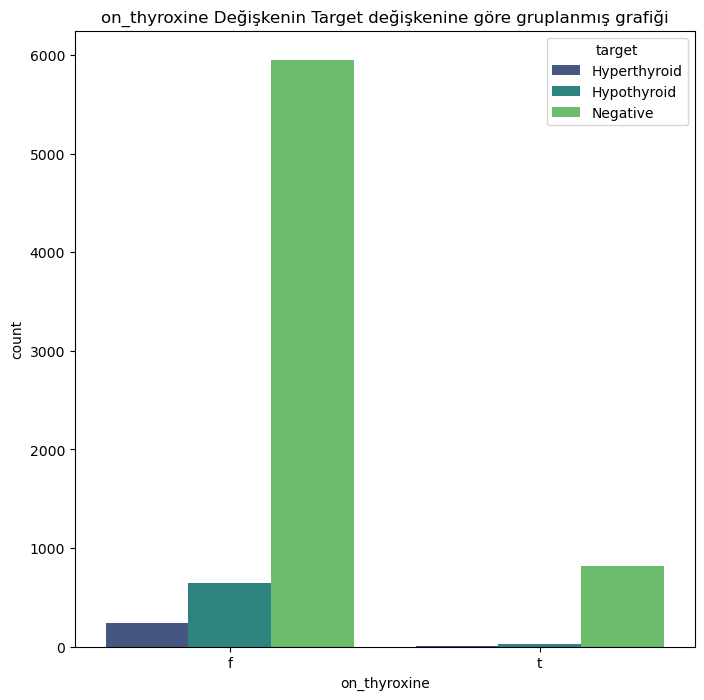



on_thyroxine  target      
f             Negative        5949
              Hypothyroid      641
              Hyperthyroid     235
t             Negative         818
              Hypothyroid       26
              Hyperthyroid       6
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [24]:
dataVisualization(data, "on_thyroxine")

bu değişkenimze target (hastalık durumu) değişkenimizle gruplayıp baktığımızda false olup hasta olmayan en çok tekrar etmiş 

In [25]:
statisticalTest(data, "on_thyroxine")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  59.974453216549634
P-Value Değeri:  9.477918206126861e-14
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[ 214.30944625  593.13029316 6017.56026059]
 [  26.69055375   73.86970684  749.43973941]]
on_thyroxine Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [26]:
descriptiveStatistics(data, "query_on_thyroxine")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      9015
Name: query_on_thyroxine, dtype: object


Değişkenimizin Sınıf Frekansları:
query_on_thyroxine
f    9015
t     153
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


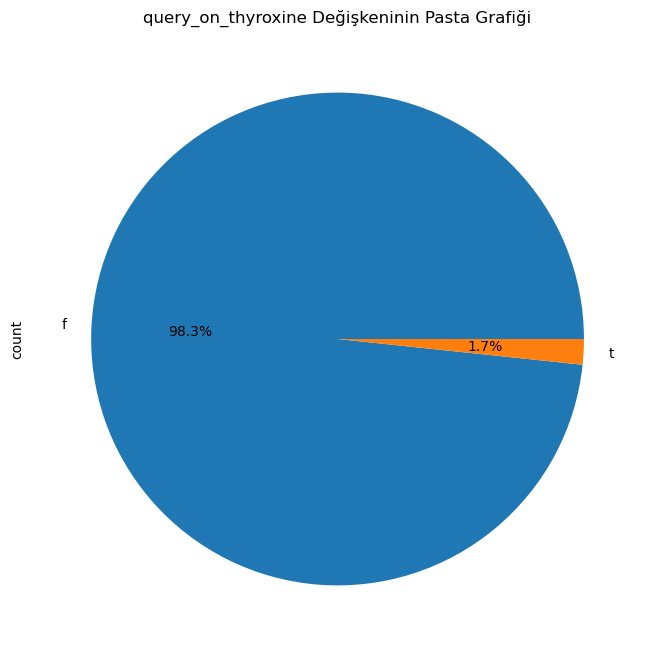

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)




query_on_thyroxine  Değişkenin Target değişkenine göre grublanmış grafiği


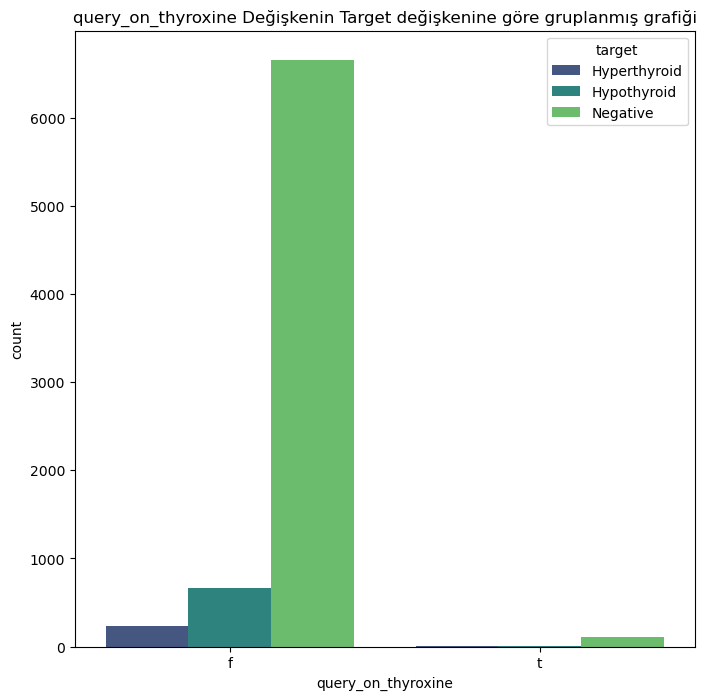



query_on_thyroxine  target      
f                   Negative        6654
                    Hypothyroid      659
                    Hyperthyroid     239
t                   Negative         113
                    Hypothyroid        8
                    Hyperthyroid       2
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [27]:
dataVisualization(data, "query_on_thyroxine")

In [28]:
statisticalTest(data, "query_on_thyroxine")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  1.7943625002007688
P-Value Değeri:  0.40771729461616135
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[2.37137720e+02 6.56310619e+02 6.65855166e+03]
 [3.86228013e+00 1.06893811e+01 1.08448339e+02]]
query_on_thyroxine Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki yoktur


In [29]:
descriptiveStatistics(data, "on_antithyroid_meds")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      9052
Name: on_antithyroid_meds, dtype: object


Değişkenimizin Sınıf Frekansları:
on_antithyroid_meds
f    9052
t     116
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


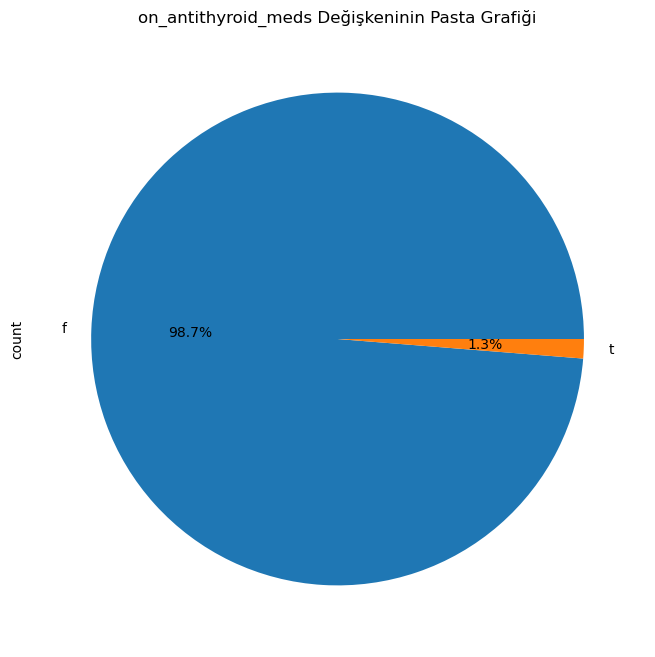



on_antithyroid_meds  Değişkenin Target değişkenine göre grublanmış grafiği


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


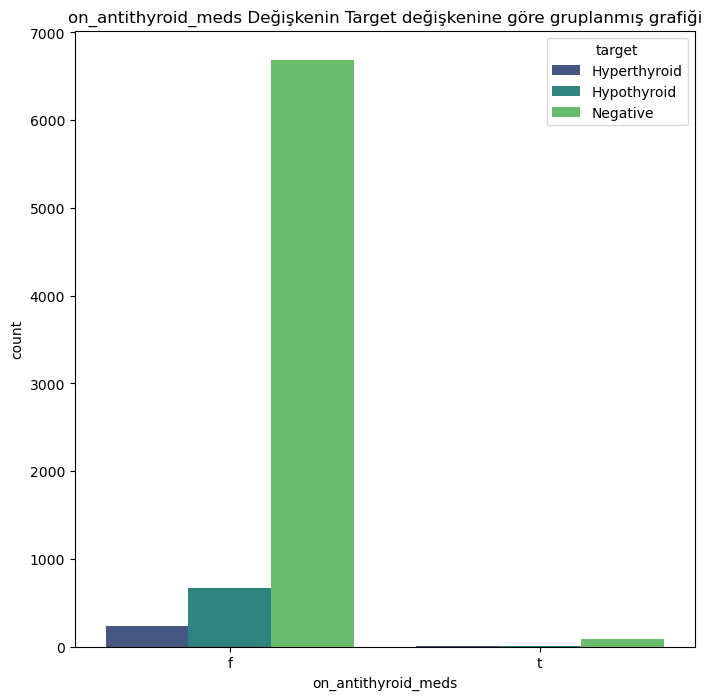



on_antithyroid_meds  target      
f                    Negative        6686
                     Hypothyroid      663
                     Hyperthyroid     234
t                    Negative          81
                     Hyperthyroid       7
                     Hypothyroid        4
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [30]:
dataVisualization(data, "on_antithyroid_meds")

In [31]:
statisticalTest(data, "on_antithyroid_meds")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  7.942422152252943
P-Value Değeri:  0.018850589806154186
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[2.38111140e+02 6.59004691e+02 6.68588417e+03]
 [2.88885993e+00 7.99530945e+00 8.11158306e+01]]
on_antithyroid_meds Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [32]:
descriptiveStatistics(data, "sick")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      8824
Name: sick, dtype: object


Değişkenimizin Sınıf Frekansları:
sick
f    8824
t     344
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


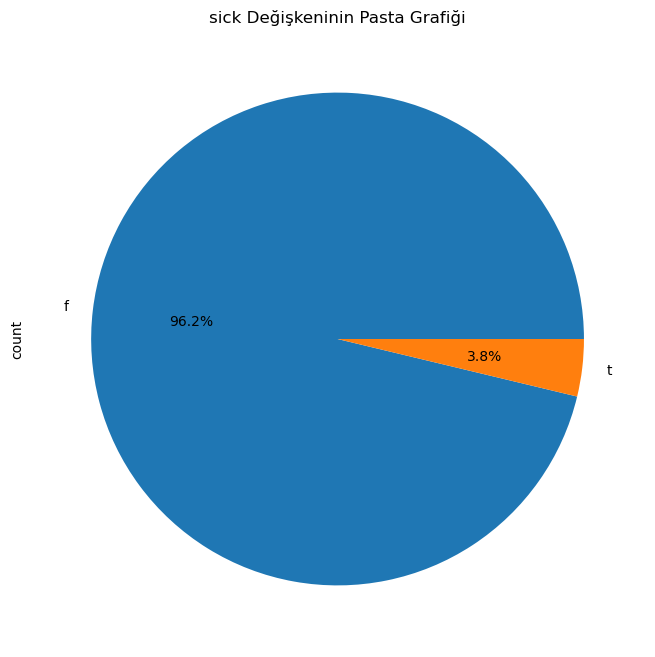



sick  Değişkenin Target değişkenine göre grublanmış grafiği


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


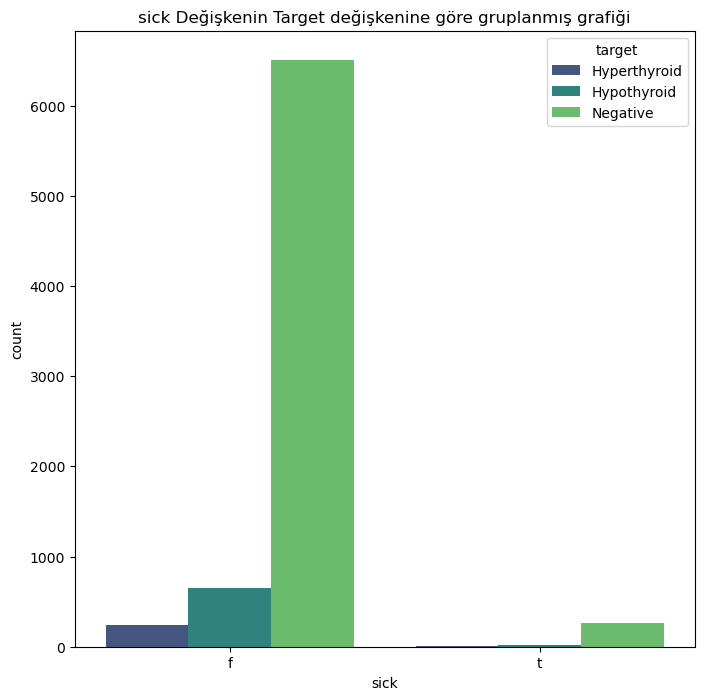



sick  target      
f     Negative        6505
      Hypothyroid      647
      Hyperthyroid     236
t     Negative         262
      Hypothyroid       20
      Hyperthyroid       5
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [33]:
dataVisualization(data, "sick")

In [34]:
statisticalTest(data, "sick")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  3.2017922414265345
P-Value Değeri:  0.20171567538345062
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[ 231.98801303  642.05811075 6513.95387622]
 [   9.01198697   24.94188925  253.04612378]]
sick Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki yoktur


In [35]:
### Pregnant değişkeni sadece kadınları etkileyen bir özellik olduğu için uçuracağız bu değişkeni
data = data.drop("pregnant", axis=1)
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29.0,F,f,f,f,f,f,f,t,f,...,NaN,f,NaN,f,NaN,f,NaN,f,NaN,Negative
1,29.0,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,NaN,Negative
2,41.0,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,t,11.0,Negative
3,36.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26.0,Negative
4,32.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36.0,NaN


In [36]:
descriptiveStatistics(data, "thyroid_surgery")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      9034
Name: thyroid_surgery, dtype: object


Değişkenimizin Sınıf Frekansları:
thyroid_surgery
f    9034
t     134
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


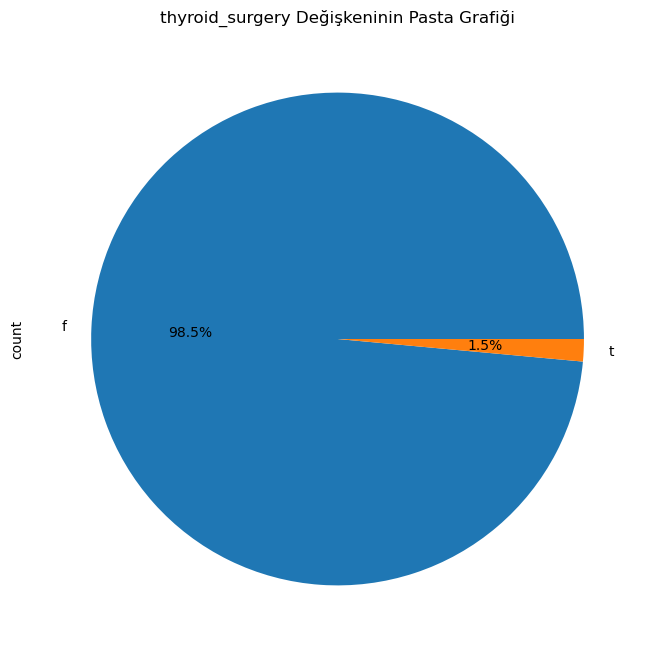

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)




thyroid_surgery  Değişkenin Target değişkenine göre grublanmış grafiği


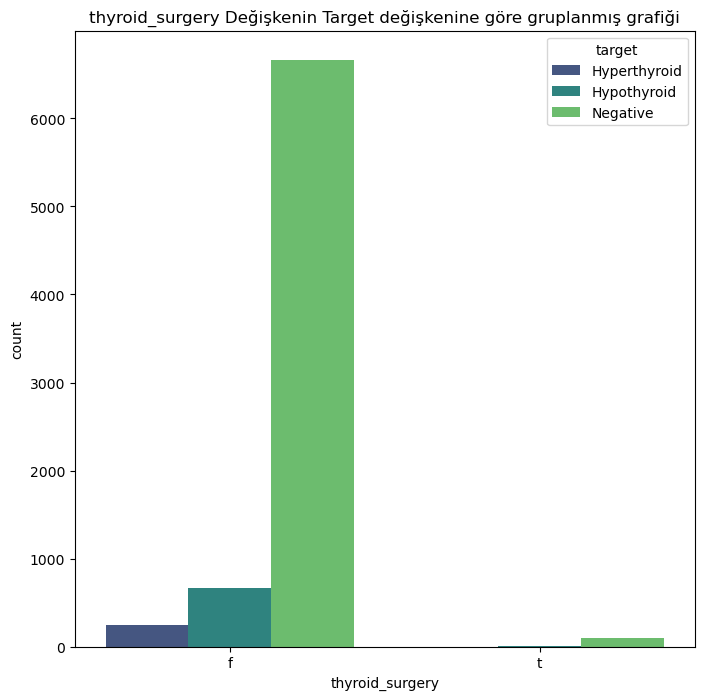



thyroid_surgery  target      
f                Negative        6665
                 Hypothyroid      663
                 Hyperthyroid     241
t                Negative         102
                 Hypothyroid        4
                 Hyperthyroid       0
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [37]:
dataVisualization(data, "thyroid_surgery")

In [38]:
statisticalTest(data, "thyroid_surgery")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  7.1566019087481285
P-Value Değeri:  0.02792310059640445
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[2.37671531e+02 6.57788013e+02 6.67354046e+03]
 [3.32846906e+00 9.21198697e+00 9.34595440e+01]]
thyroid_surgery Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [39]:
descriptiveStatistics(data, "I131_treatment")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      8999
Name: I131_treatment, dtype: object


Değişkenimizin Sınıf Frekansları:
I131_treatment
f    8999
t     169
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


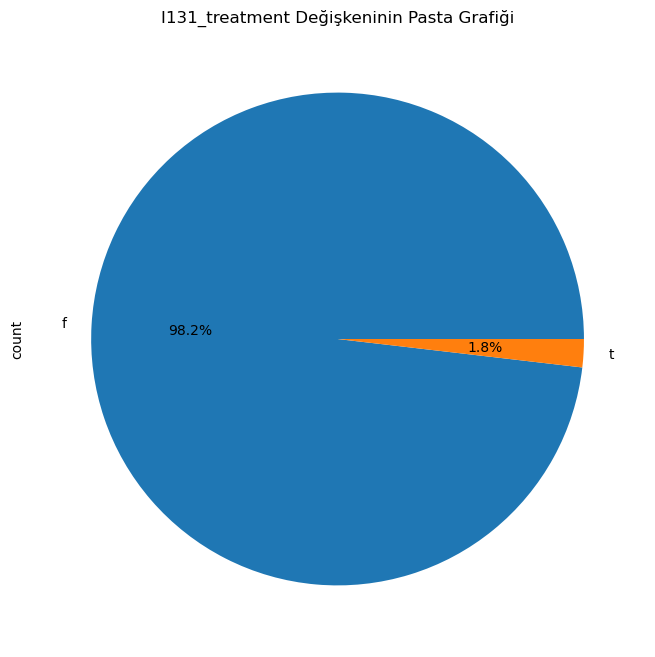

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)




I131_treatment  Değişkenin Target değişkenine göre grublanmış grafiği


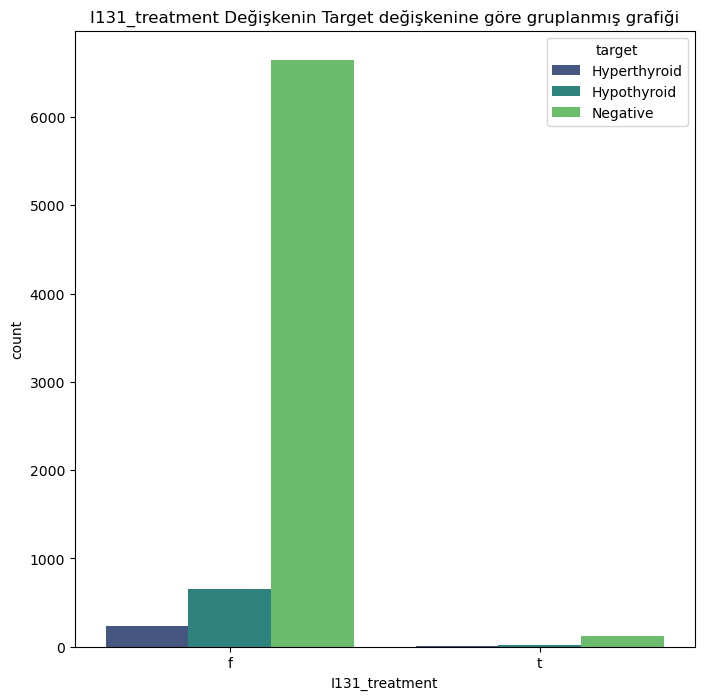



I131_treatment  target      
f               Negative        6645
                Hypothyroid      653
                Hyperthyroid     236
t               Negative         122
                Hypothyroid       14
                Hyperthyroid       5
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [40]:
dataVisualization(data, "I131_treatment")

In [41]:
statisticalTest(data, "I131_treatment")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  0.3730083391974233
P-Value Değeri:  0.8298551017813689
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[2.36572508e+02 6.54746319e+02 6.64268117e+03]
 [4.42749186e+00 1.22536808e+01 1.24318827e+02]]
I131_treatment Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki yoktur


In [42]:
descriptiveStatistics(data, "query_hypothyroid")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      8538
Name: query_hypothyroid, dtype: object


Değişkenimizin Sınıf Frekansları:
query_hypothyroid
f    8538
t     630
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


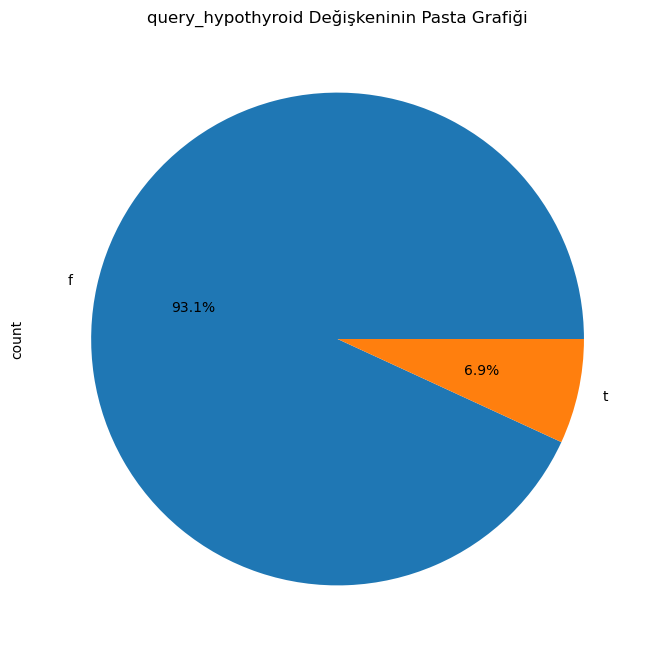

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)




query_hypothyroid  Değişkenin Target değişkenine göre grublanmış grafiği


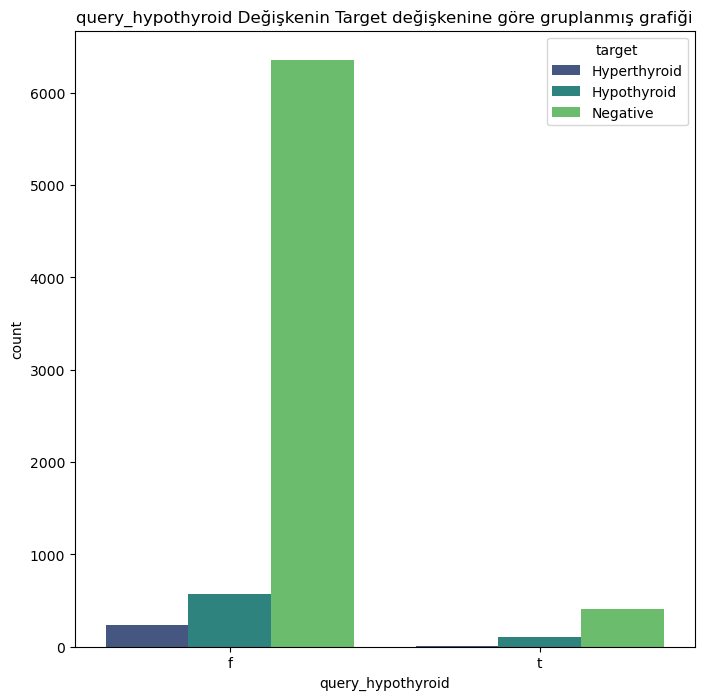



query_hypothyroid  target      
f                  Negative        6358
                   Hypothyroid      566
                   Hyperthyroid     231
t                  Negative         409
                   Hypothyroid      101
                   Hyperthyroid      10
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [43]:
dataVisualization(data, "query_hypothyroid")

In [44]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29.0,F,f,f,f,f,f,f,t,f,...,NaN,f,NaN,f,NaN,f,NaN,f,NaN,Negative
1,29.0,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,NaN,Negative
2,41.0,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,t,11.0,Negative
3,36.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26.0,Negative
4,32.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.0,M,f,f,f,f,f,f,f,t,...,NaN,t,64.0,t,0.83,t,77.0,f,NaN,Negative
9168,22.0,M,f,f,f,f,f,f,f,f,...,NaN,t,91.0,t,0.92,t,99.0,f,NaN,Negative
9169,69.0,M,f,f,f,f,f,f,f,f,...,NaN,t,113.0,t,1.27,t,89.0,f,NaN,NaN
9170,47.0,F,f,f,f,f,f,f,f,f,...,NaN,t,75.0,t,0.85,t,88.0,f,NaN,Negative


In [45]:
statisticalTest(data, "query_hypothyroid")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  82.29043908930106
P-Value Değeri:  1.3516311593133705e-18
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[ 224.67166124  621.80912052 6308.51921824]
 [  16.32833876   45.19087948  458.48078176]]
query_hypothyroid Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [46]:
descriptiveStatistics(data, "query_hyperthyroid")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      8518
Name: query_hyperthyroid, dtype: object


Değişkenimizin Sınıf Frekansları:
query_hyperthyroid
f    8518
t     650
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


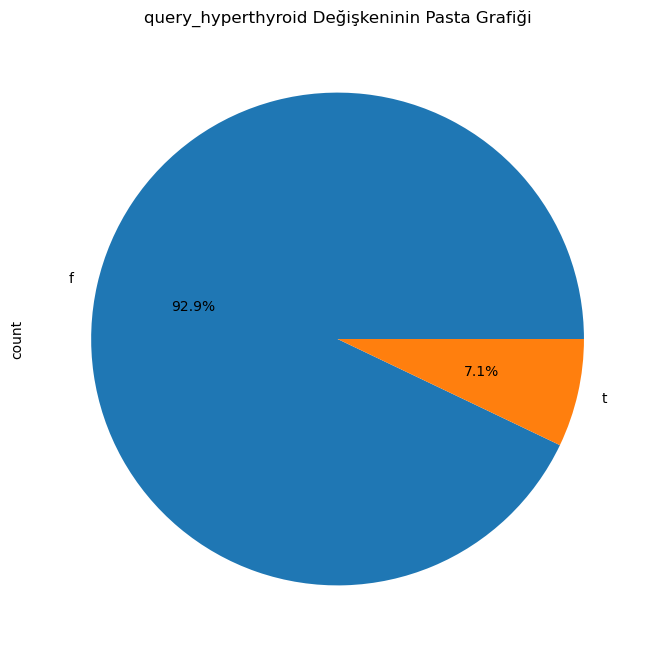



query_hyperthyroid  Değişkenin Target değişkenine göre grublanmış grafiği


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


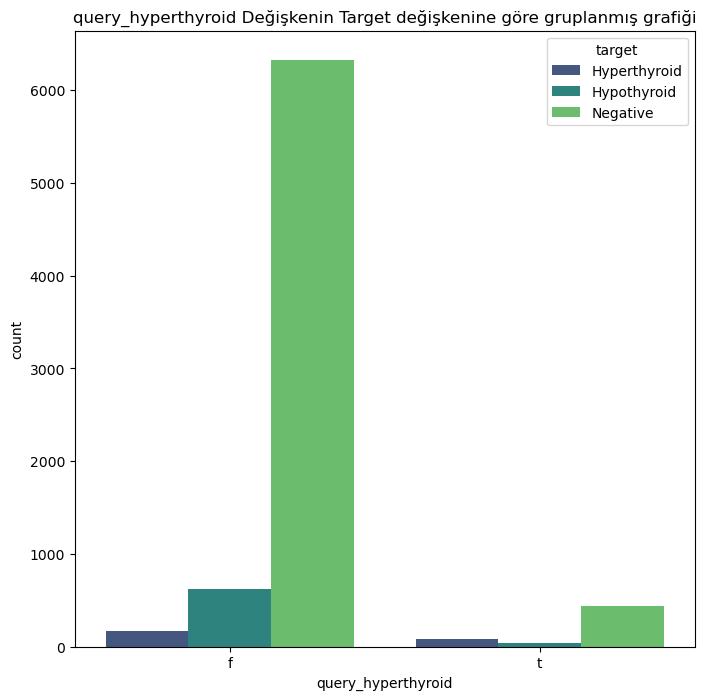



query_hyperthyroid  target      
f                   Negative        6327
                    Hypothyroid      624
                    Hyperthyroid     164
t                   Negative         440
                    Hyperthyroid      77
                    Hypothyroid       43
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [47]:
dataVisualization(data, "query_hyperthyroid")

In [48]:
statisticalTest(data, "query_hyperthyroid")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  223.58334795510186
P-Value Değeri:  2.8150937905097366e-49
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[ 223.41563518  618.33289902 6273.2514658 ]
 [  17.58436482   48.66710098  493.7485342 ]]
query_hyperthyroid Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [49]:
descriptiveStatistics(data, "lithium")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      9075
Name: lithium, dtype: object


Değişkenimizin Sınıf Frekansları:
lithium
f    9075
t      93
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


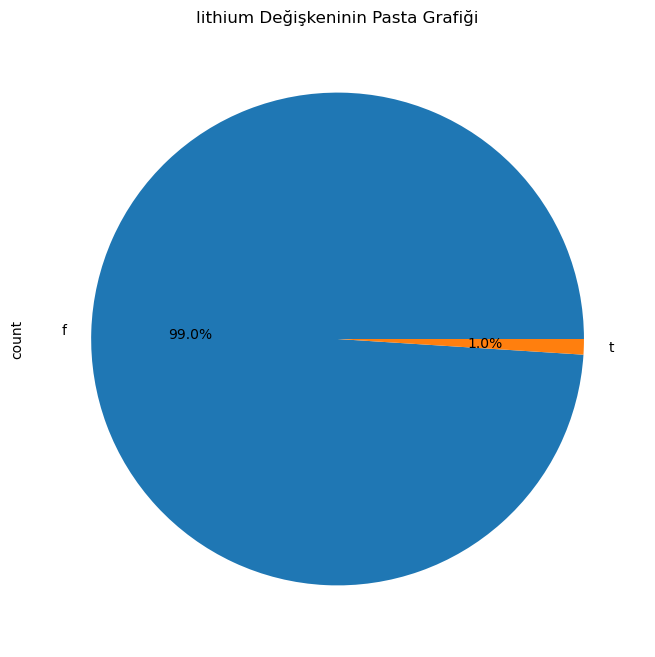



lithium  Değişkenin Target değişkenine göre grublanmış grafiği


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


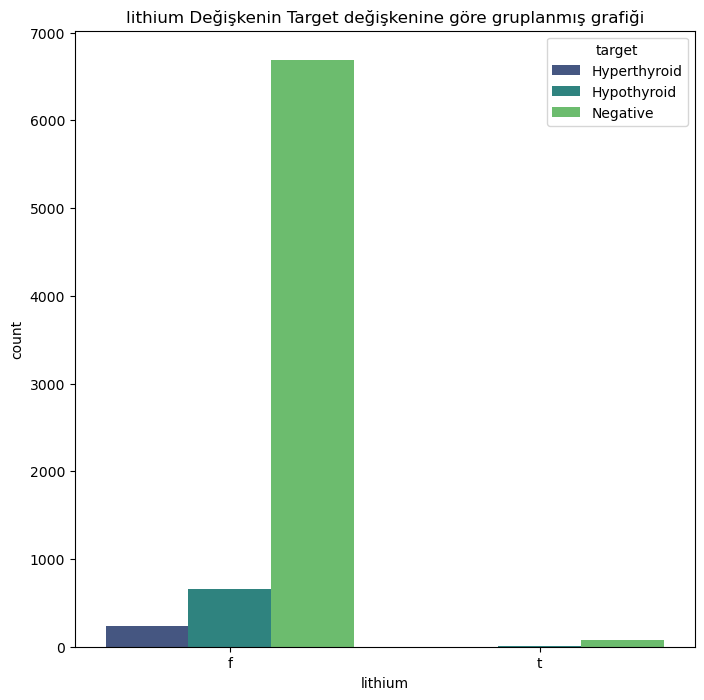



lithium  target      
f        Negative        6687
         Hypothyroid      661
         Hyperthyroid     241
t        Negative          80
         Hypothyroid        6
         Hyperthyroid       0
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [50]:
dataVisualization(data, "lithium")

In [51]:
statisticalTest(data, "lithium")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  3.2574140240480944
P-Value Değeri:  0.1961830725602852
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[2.38299544e+02 6.59526124e+02 6.69117433e+03]
 [2.70045603e+00 7.47387622e+00 7.58256678e+01]]
lithium Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki yoktur


In [52]:
descriptiveStatistics(data, "goitre")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      9084
Name: goitre, dtype: object


Değişkenimizin Sınıf Frekansları:
goitre
f    9084
t      84
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


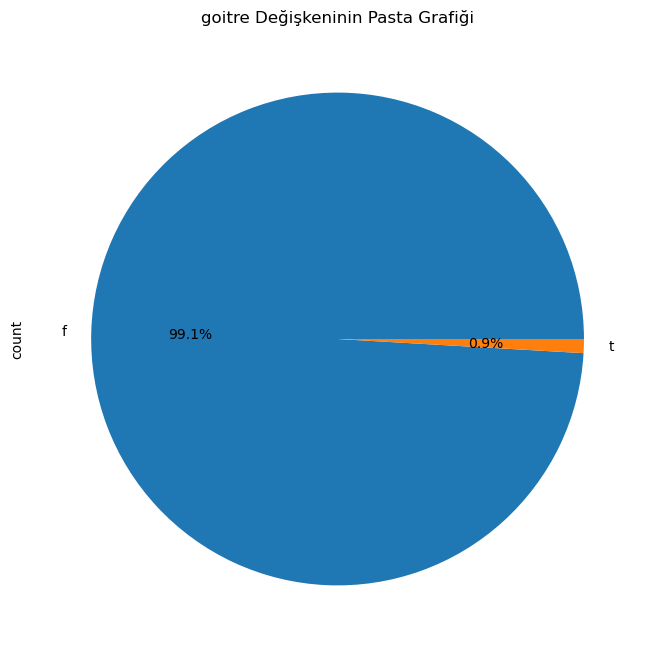

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)




goitre  Değişkenin Target değişkenine göre grublanmış grafiği


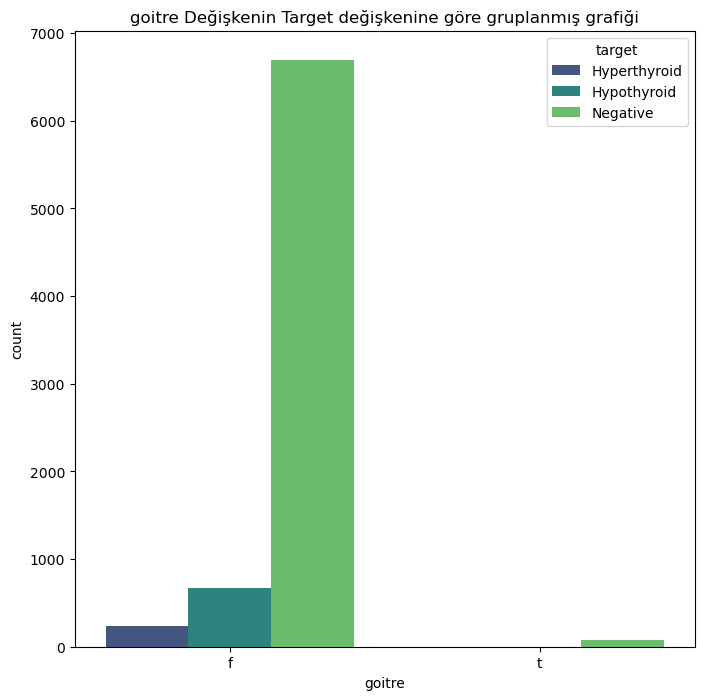



goitre  target      
f       Negative        6693
        Hypothyroid      667
        Hyperthyroid     241
t       Negative          74
        Hyperthyroid       0
        Hypothyroid        0
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [53]:
dataVisualization(data, "goitre")

In [54]:
statisticalTest(data, "goitre")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  10.026031006668934
P-Value Değeri:  0.006650817474757756
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[2.38676352e+02 6.60568990e+02 6.70175466e+03]
 [2.32364821e+00 6.43100977e+00 6.52453420e+01]]
goitre Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [55]:
descriptiveStatistics(data, "tumor")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      8927
Name: tumor, dtype: object


Değişkenimizin Sınıf Frekansları:
tumor
f    8927
t     241
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


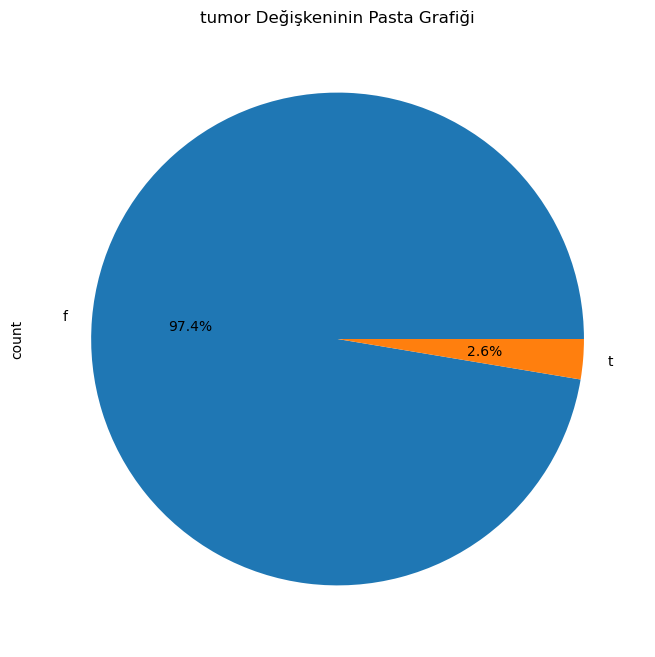



tumor  Değişkenin Target değişkenine göre grublanmış grafiği


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


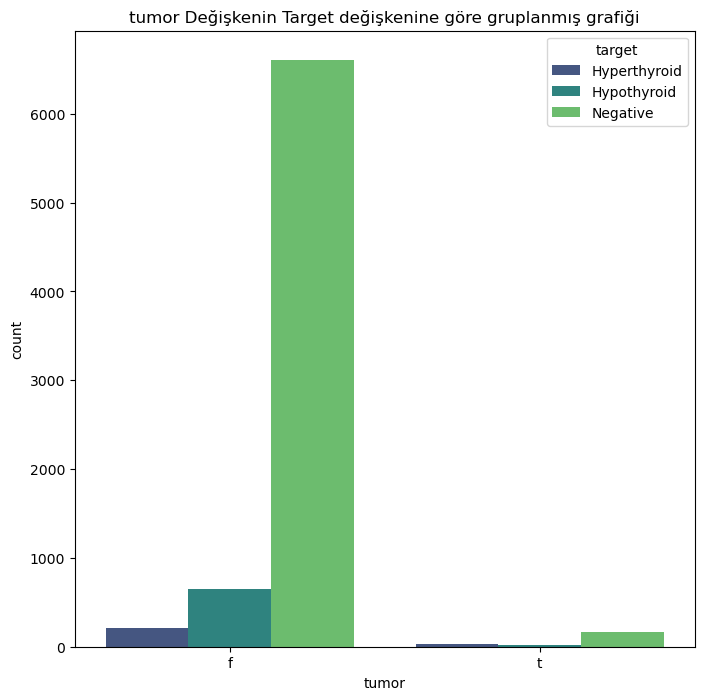



tumor  target      
f      Negative        6605
       Hypothyroid      653
       Hyperthyroid     214
t      Negative         162
       Hyperthyroid      27
       Hypothyroid       14
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [56]:
dataVisualization(data, "tumor")

In [57]:
statisticalTest(data, "tumor")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  70.9800293478754
P-Value Değeri:  3.8626242653568785e-16
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[2.34625668e+02 6.49358176e+02 6.58801616e+03]
 [6.37433225e+00 1.76418241e+01 1.78983844e+02]]
tumor Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [58]:
descriptiveStatistics(data, "hypopituitary")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      9166
Name: hypopituitary, dtype: object


Değişkenimizin Sınıf Frekansları:
hypopituitary
f    9166
t       2
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


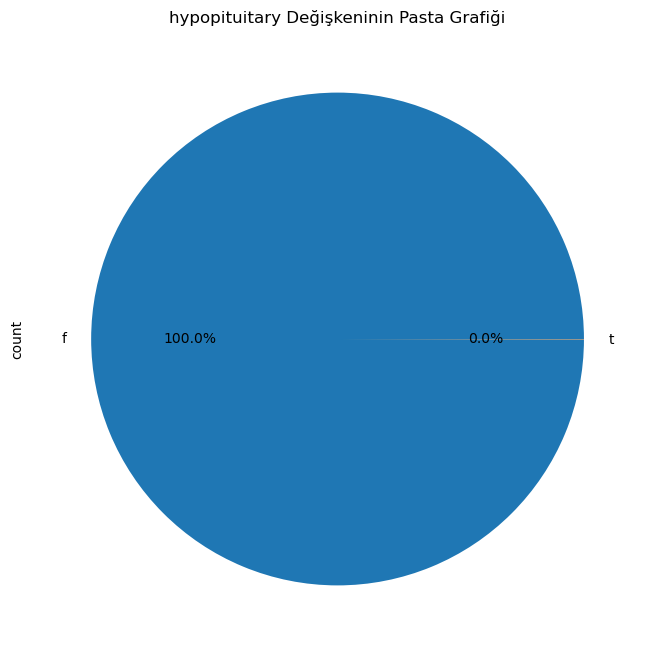

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)




hypopituitary  Değişkenin Target değişkenine göre grublanmış grafiği


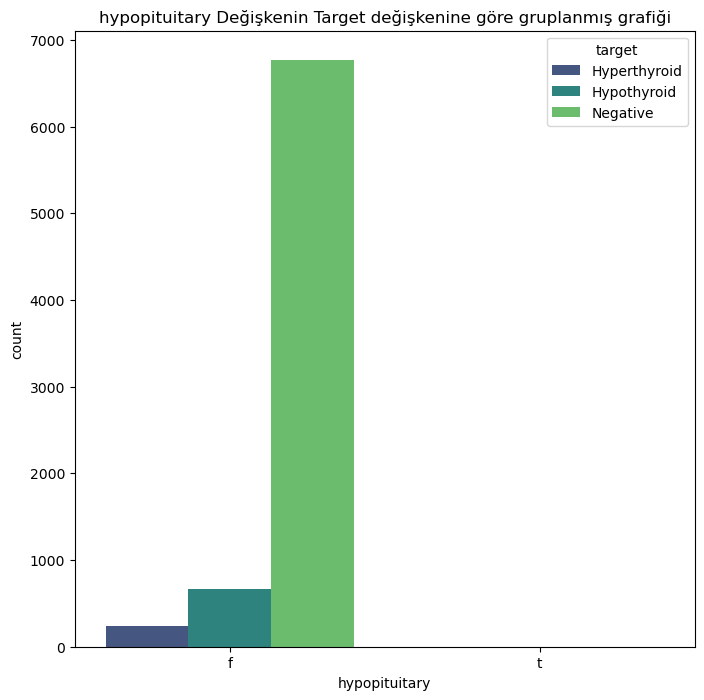



hypopituitary  target      
f              Negative        6767
               Hypothyroid      667
               Hyperthyroid     241
t              Hyperthyroid       0
               Hypothyroid        0
               Negative           0
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [59]:
dataVisualization(data, "hypopituitary")

In [60]:
statisticalTest(data, "hypopituitary")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  0.0
P-Value Değeri:  1.0
Serbestlik Derecesi:  0
Beklenen Frekanslar: 
[[ 241.  667. 6767.]]
hypopituitary Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki yoktur


In [61]:
descriptiveStatistics(data, "psych")

Değişkenimizin Açıklayıvıc İstatistikleri:
count     9168
unique       2
top          f
freq      8750
Name: psych, dtype: object


Değişkenimizin Sınıf Frekansları:
psych
f    8750
t     418
Name: count, dtype: int64


Değişkenimizde ki toplam eksik değerler: 
0


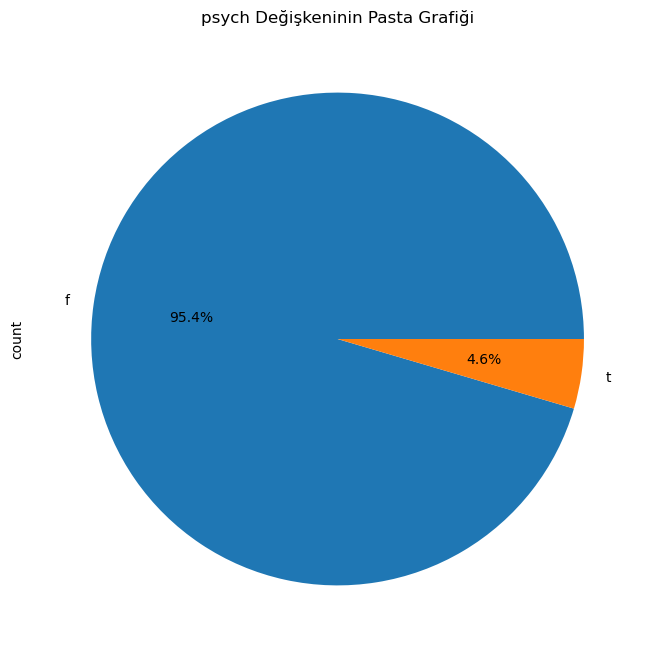



psych  Değişkenin Target değişkenine göre grublanmış grafiği


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


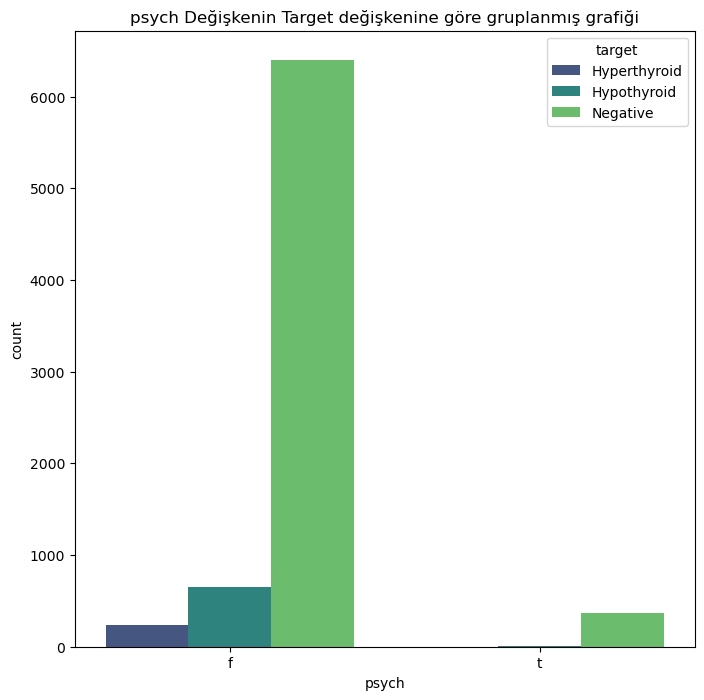



psych  target      
f      Negative        6398
       Hypothyroid      655
       Hyperthyroid     241
t      Negative         369
       Hypothyroid       12
       Hyperthyroid       0
Name: count, dtype: int64


C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3609196661.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(feature)["target"].value_counts())


In [62]:
dataVisualization(data, "psych")

In [63]:
statisticalTest(data, "psych")

Ki-Kare Testi Sonuçları: 
Ki-Kare Değeri:  30.178240088784513
P-Value Değeri:  2.798197910442172e-07
Serbestlik Derecesi:  2
Beklenen Frekanslar: 
[[ 229.03635179  633.88899023 6431.07465798]
 [  11.96364821   33.11100977  335.92534202]]
psych Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [64]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29.0,F,f,f,f,f,f,f,t,f,...,NaN,f,NaN,f,NaN,f,NaN,f,NaN,Negative
1,29.0,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,NaN,Negative
2,41.0,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,t,11.0,Negative
3,36.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26.0,Negative
4,32.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.0,M,f,f,f,f,f,f,f,t,...,NaN,t,64.0,t,0.83,t,77.0,f,NaN,Negative
9168,22.0,M,f,f,f,f,f,f,f,f,...,NaN,t,91.0,t,0.92,t,99.0,f,NaN,Negative
9169,69.0,M,f,f,f,f,f,f,f,f,...,NaN,t,113.0,t,1.27,t,89.0,f,NaN,NaN
9170,47.0,F,f,f,f,f,f,f,f,f,...,NaN,t,75.0,t,0.85,t,88.0,f,NaN,Negative


In [65]:
# burada _measured içeren sütunları uçuralım
for col in data.columns:
    if "_measured" in col:
        data.drop(col, inplace=True, axis=1)

In [66]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29.0,F,f,f,f,f,f,f,t,f,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,Negative
1,29.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,Negative
2,41.0,F,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,Negative
3,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,Negative
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.0,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,Negative
9168,22.0,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,Negative
9169,69.0,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,NaN
9170,47.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,Negative


In [67]:
descriptiveStatistics(data, "TSH")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    8326.000000
mean        5.220548
std        24.189614
min         0.005000
25%         0.462500
50%         1.400000
75%         2.700000
max       530.000000
Name: TSH, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
842


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


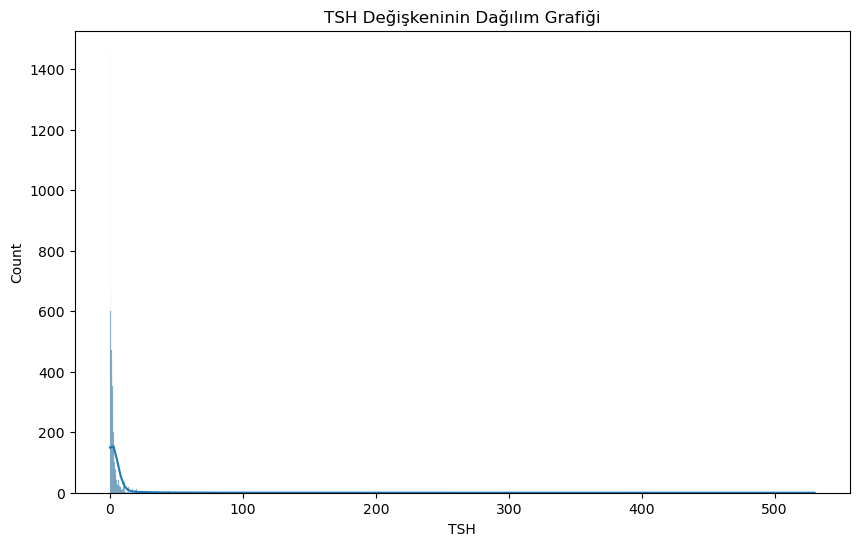

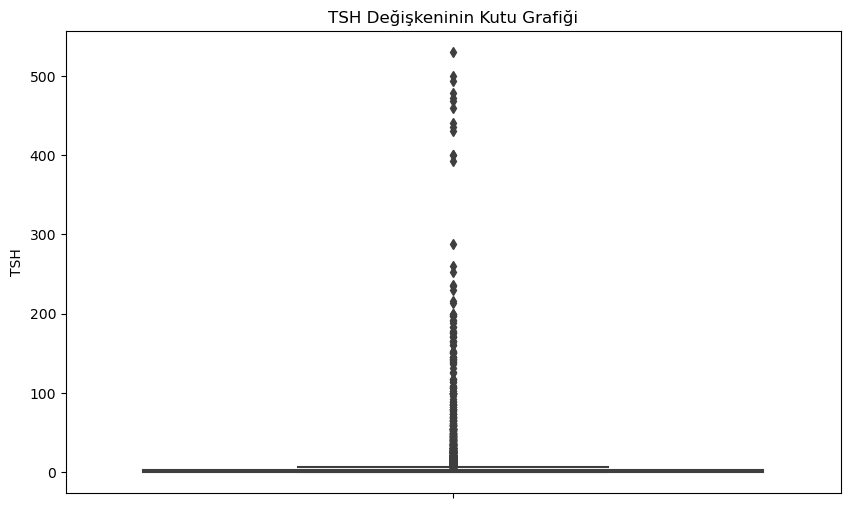

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


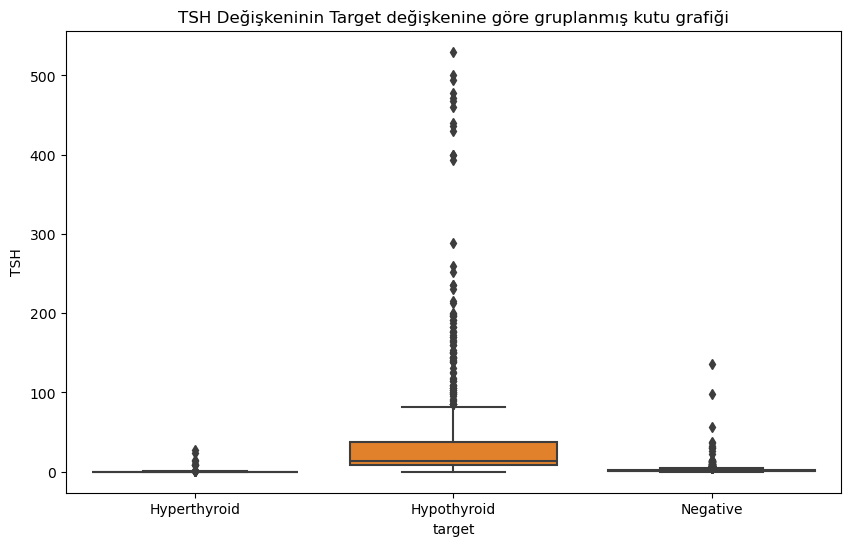

In [68]:
dataVisualization(data, "TSH")

In [69]:
# burada boş değerleri uçuralım 
data = data.dropna(subset=["TSH"])

In [70]:
descriptiveStatistics(data, "TSH")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    8326.000000
mean        5.220548
std        24.189614
min         0.005000
25%         0.462500
50%         1.400000
75%         2.700000
max       530.000000
Name: TSH, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
0


In [71]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29.0,F,f,f,f,f,f,f,t,f,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,Negative
1,29.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,Negative
7,28.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.7,2.6,116.0,NaN,NaN,NaN,Negative
8,28.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.2,1.8,76.0,NaN,NaN,NaN,Negative
9,28.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.9,1.7,83.0,NaN,NaN,NaN,Negative


In [72]:
statisticalTest(data, "TSH")

Anova Testi Sonuçları: 
F-Stat Değeri:  903.4547718638432
P-Value Değeri:  0.0
TSH Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [73]:
descriptiveStatistics(data, "T3")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    6350.000000
mean        1.959888
std         0.880009
min         0.050000
25%         1.500000
50%         1.900000
75%         2.300000
max        18.000000
Name: T3, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
1976


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


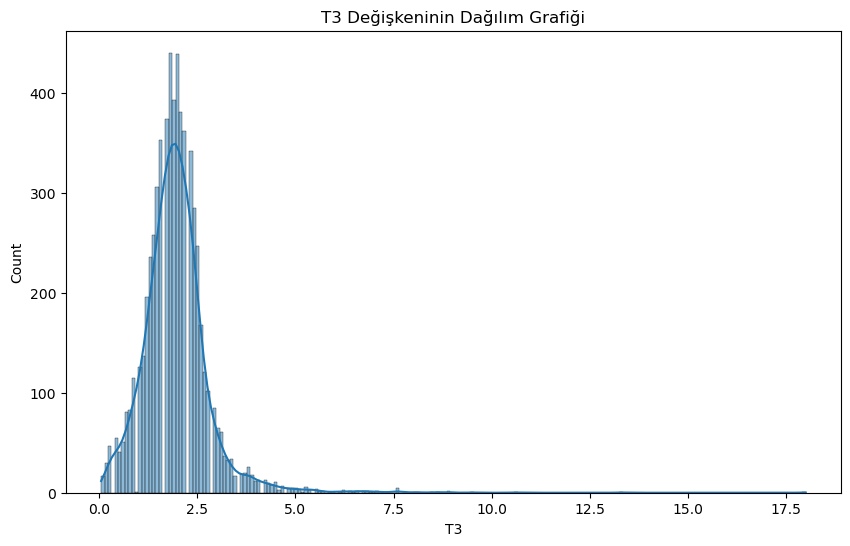

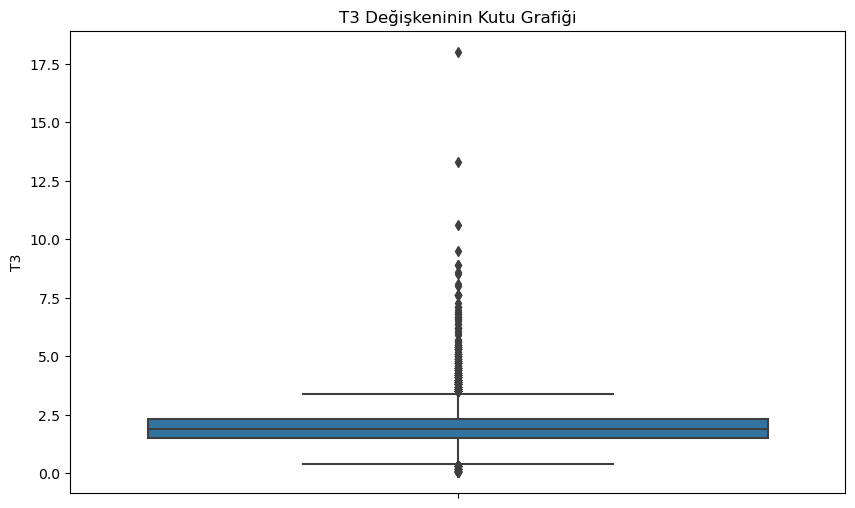

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


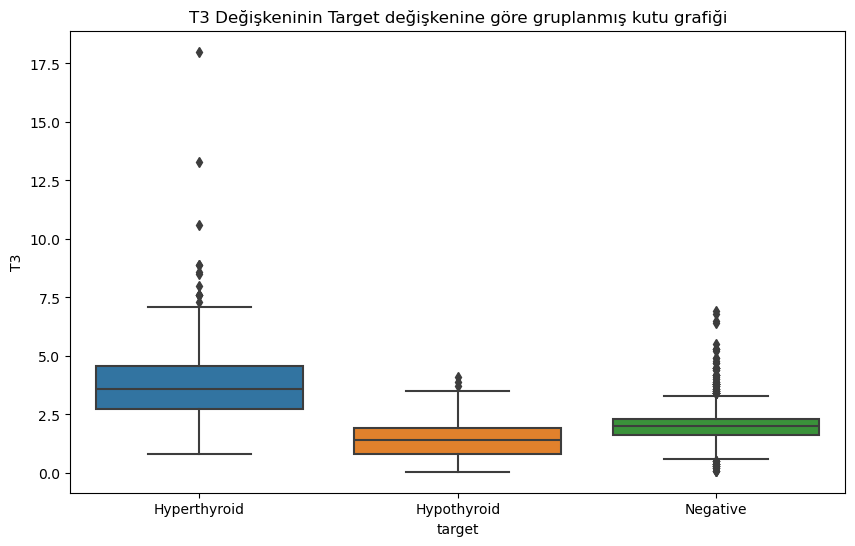

In [74]:
dataVisualization(data, "T3")

In [75]:
data = data.dropna(subset=["T3"])

In [76]:
statisticalTest(data, "T3")

Anova Testi Sonuçları: 
F-Stat Değeri:  932.0704163706399
P-Value Değeri:  0.0
T3 Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [77]:
descriptiveStatistics(data, "TT4")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    6322.000000
mean      107.795723
std        37.350655
min         2.000000
25%        87.000000
50%       104.000000
75%       124.000000
max       450.000000
Name: TT4, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
28


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


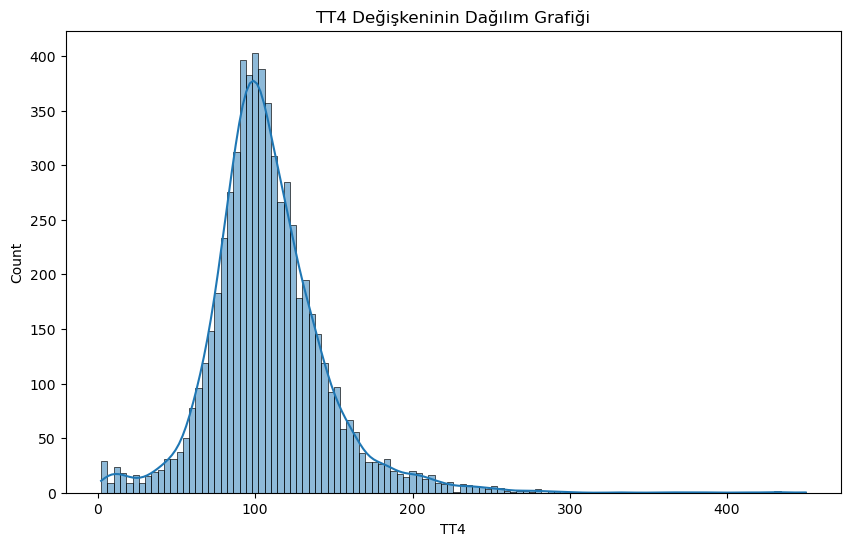

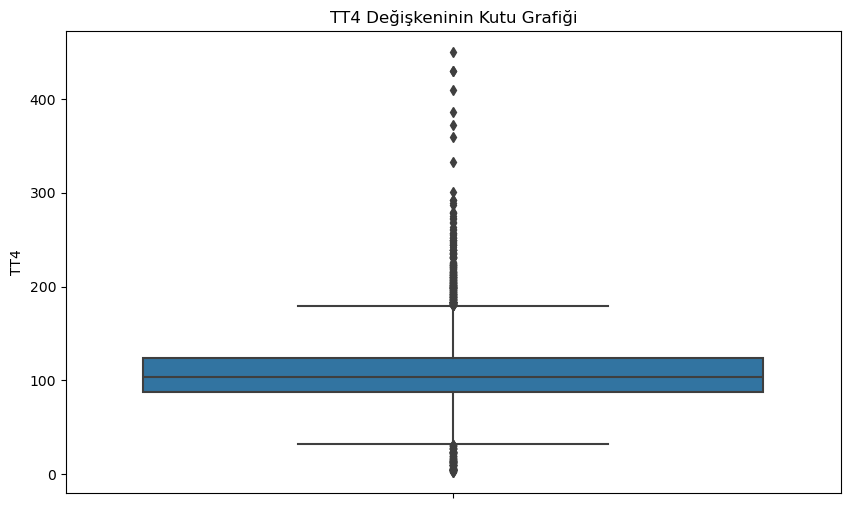

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


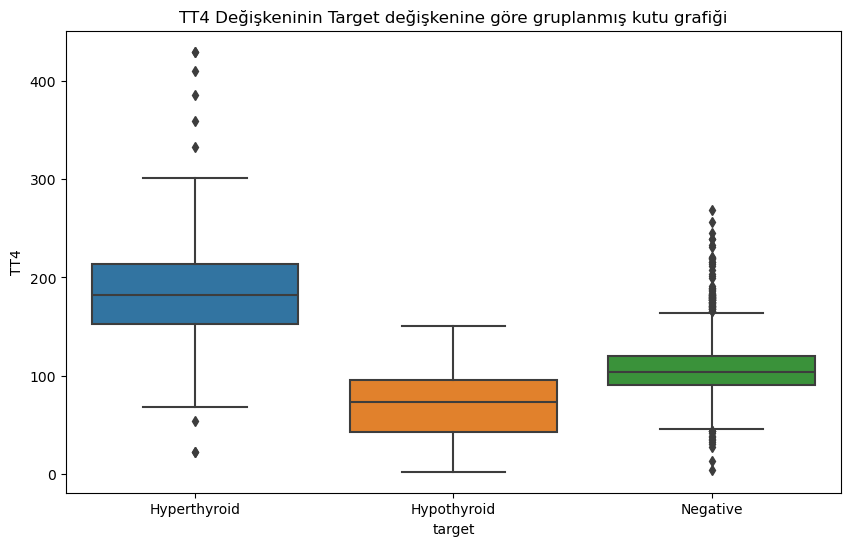

In [78]:
dataVisualization(data, "TT4")

In [79]:
# burada TT4 sütununda boş değere sahip olan satırları inceleyelim
data[data["TT4"].isna()]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
921,65.0,F,f,f,f,f,f,f,t,f,...,f,f,f,10.00,1.1,NaN,NaN,NaN,NaN,Hypothyroid
1020,71.0,NaN,f,f,f,f,f,f,f,f,...,f,f,f,2.60,1.2,NaN,NaN,NaN,NaN,Negative
1021,71.0,NaN,f,f,f,f,f,f,f,f,...,f,f,f,4.30,0.7,NaN,NaN,NaN,NaN,NaN
1334,25.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.10,2.8,NaN,NaN,NaN,NaN,Negative
1390,42.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.10,3.1,NaN,NaN,NaN,NaN,Negative
1696,42.0,M,t,f,f,f,f,f,f,f,...,f,f,f,38.00,3.8,NaN,NaN,NaN,NaN,Negative
1720,22.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.35,1.6,NaN,NaN,NaN,NaN,Negative
1742,35.0,F,t,f,f,f,f,f,f,f,...,f,f,f,31.00,2.6,NaN,NaN,NaN,NaN,Negative
3125,53.0,M,f,f,f,f,f,f,f,f,...,f,f,f,12.00,2.0,NaN,NaN,NaN,NaN,Hypothyroid
3290,72.0,M,f,f,f,f,f,f,f,t,...,t,f,f,1.50,1.8,NaN,0.93,112.0,NaN,Negative


In [80]:
# t3 sütununda boş değerleri olan satırları uçuralım
data = data.dropna(subset=["TT4"])

In [81]:
statisticalTest(data, "TT4")

Anova Testi Sonuçları: 
F-Stat Değeri:  1222.9264793876857
P-Value Değeri:  0.0
TT4 Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [82]:
descriptiveStatistics(data, "T4U")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    5981.000000
mean        0.974465
std         0.196062
min         0.170000
25%         0.860000
50%         0.960000
75%         1.070000
max         2.330000
Name: T4U, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
341


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


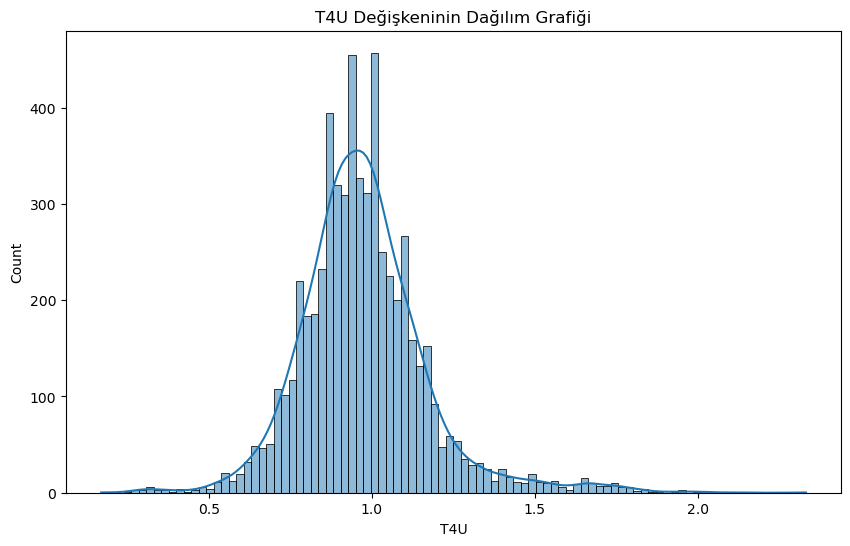

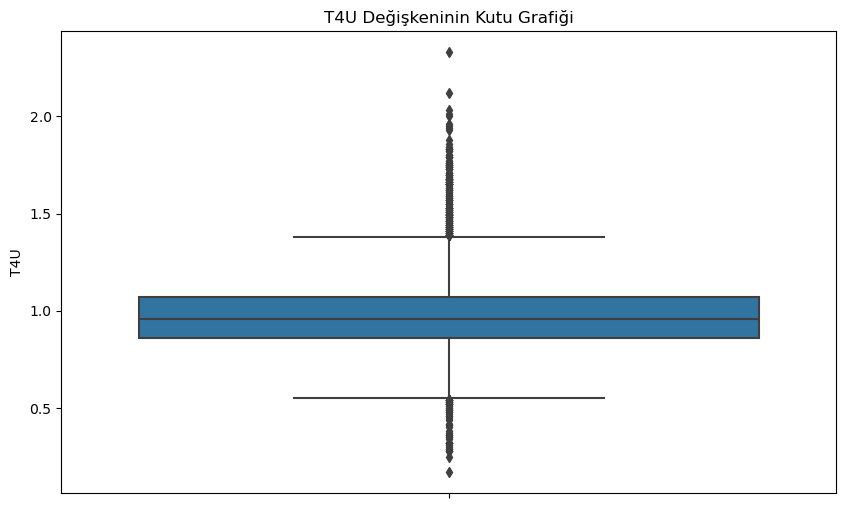

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


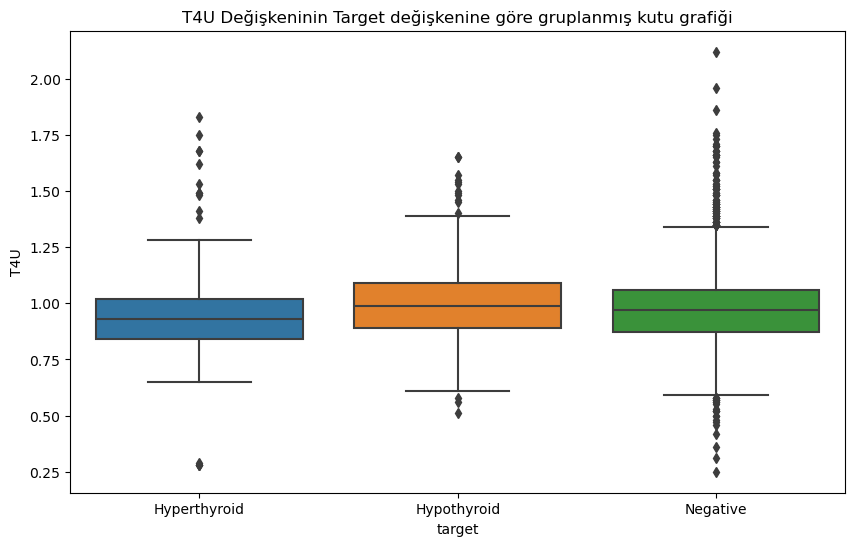

In [83]:
dataVisualization(data, "T4U")

In [84]:
data = data.dropna(subset=["T4U"])

In [85]:
statisticalTest(data, "T4U")

Anova Testi Sonuçları: 
F-Stat Değeri:  6.037814745217442
P-Value Değeri:  0.002404447283590992
T4U Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [86]:
descriptiveStatistics(data, "FTI")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    5981.000000
mean      113.087617
std        42.177920
min         1.400000
25%        93.000000
50%       109.000000
75%       127.000000
max       881.000000
Name: FTI, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
0


c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


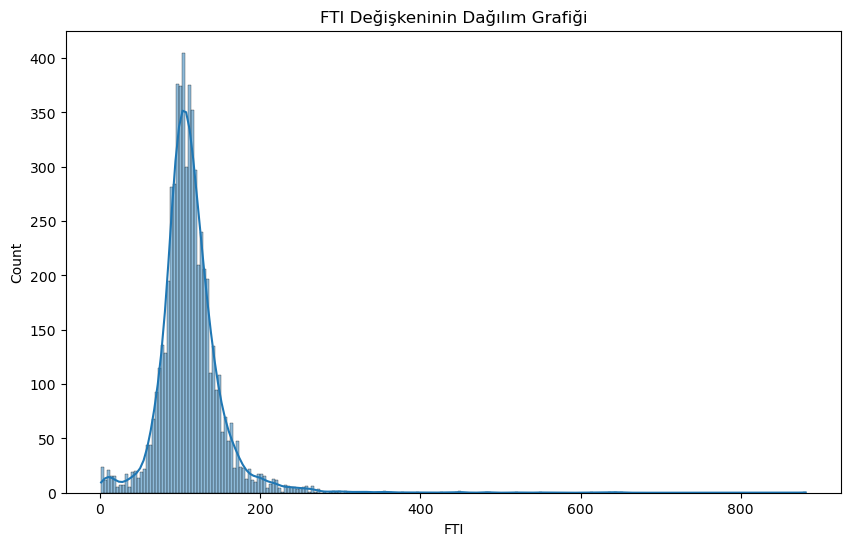

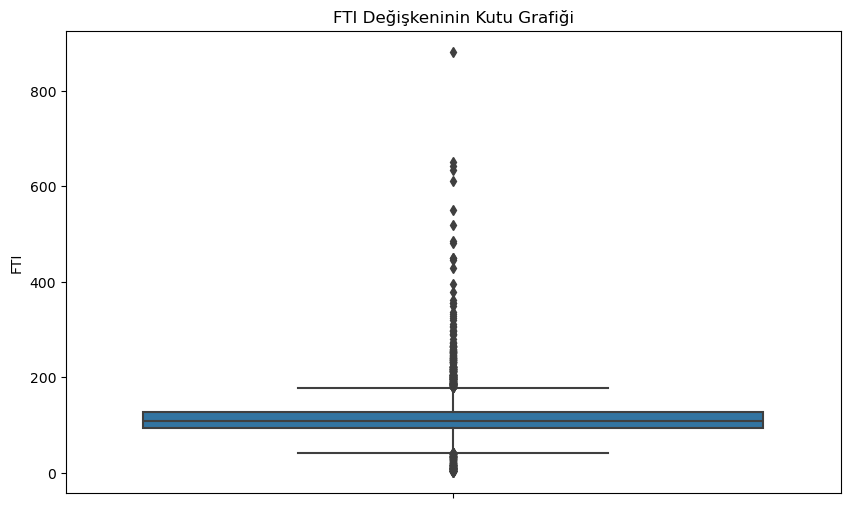

c:\Users\Veli\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


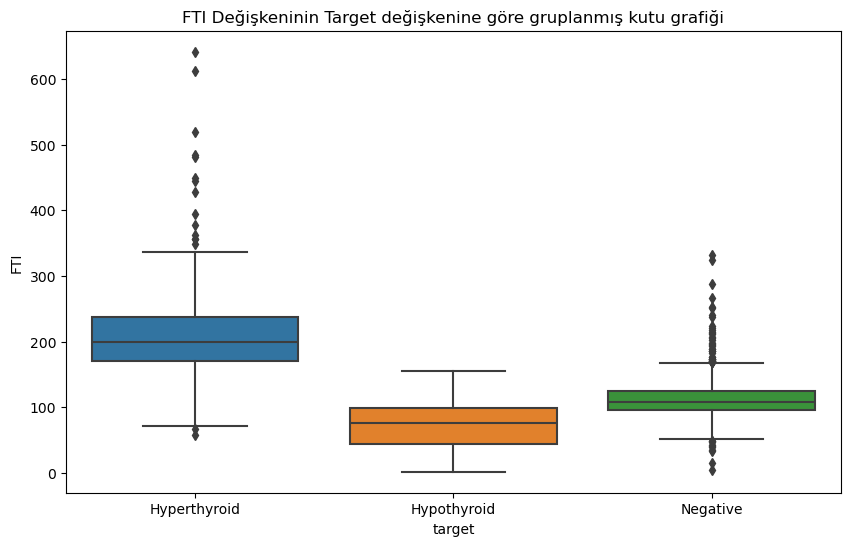

In [87]:
dataVisualization(data= data, feature="FTI")

In [88]:
# burada FTI sütununda boş değere sahip olan satırları inceleyelim
data = data.dropna(subset=["FTI"])


In [89]:
statisticalTest(data, "FTI")

Anova Testi Sonuçları: 
F-Stat Değeri:  1437.9871196158265
P-Value Değeri:  0.0
FTI Değişkeni ile target değişkeni arasında istatistiksel olarak anlamı bir ilişki vardır


In [90]:
descriptiveStatistics(data, "TBG")

Değişkenimizin Açıklayıvıc İstatistikleri:
count    31.000000
mean     29.193548
std      12.525758
min      15.000000
25%      22.000000
50%      27.000000
75%      31.000000
max      86.000000
Name: TBG, dtype: float64


Değişkenimizde ki toplam eksik değerler: 
5950


In [91]:
# burada TBG sütununu uçuralım
data = data.drop("TBG", axis=1)

In [92]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
19,36.0,F,f,f,f,f,f,f,t,t,...,f,f,f,f,1.50,2.4,90.0,1.06,85.0,Negative
21,40.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.20,2.3,104.0,1.08,96.0,Negative
22,40.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,5.90,2.1,88.0,0.84,105.0,Negative
23,77.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.05,2.4,107.0,1.13,95.0,Negative
27,51.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.05,2.1,93.0,0.87,106.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,65.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.73,1.8,85.0,0.90,94.0,Negative
9130,65.0,F,t,f,f,f,f,t,t,f,...,f,f,f,f,4.10,2.1,135.0,1.19,113.0,Negative
9134,74.0,F,f,f,f,t,f,f,f,f,...,f,f,f,f,53.00,1.0,49.0,1.25,39.0,Hypothyroid
9137,42.0,F,t,f,f,f,f,f,t,f,...,f,f,f,f,2.30,1.3,59.0,0.73,81.0,Negative


In [93]:
relational

['age',
 'on_thyroxine',
 'on_antithyroid_meds',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'goitre',
 'tumor',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI']

In [94]:
df = data[relational]
df = pd.concat([df, data["target"]], axis=1)

In [95]:
df.head()

,age,on_thyroxine,on_antithyroid_meds,thyroid_surgery,query_hypothyroid,query_hyperthyroid,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target
19,36.0,f,f,f,t,t,f,f,f,1.50,2.4,90.0,1.06,85.0,Negative
21,40.0,f,f,f,f,f,f,f,f,1.20,2.3,104.0,1.08,96.0,Negative
22,40.0,f,f,f,f,f,f,f,f,5.90,2.1,88.0,0.84,105.0,Negative
23,77.0,f,f,f,f,f,f,f,f,0.05,2.4,107.0,1.13,95.0,Negative
27,51.0,f,f,f,f,f,f,f,f,0.05,2.1,93.0,0.87,106.0,Negative


Makine öğrenmesi algoirmaları sadece sayılarla anlaşabilmektedir bu yüzden de burada ki kategorik değişkenlerimizde ki harfleri sayısallaştıracağız

In [96]:
df.replace(to_replace="f", value=0, inplace=True)
df.replace(to_replace="t", value=1, inplace=True)
df.head()

,age,on_thyroxine,on_antithyroid_meds,thyroid_surgery,query_hypothyroid,query_hyperthyroid,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target
19,36.0,0,0,0,1,1,0,0,0,1.50,2.4,90.0,1.06,85.0,Negative
21,40.0,0,0,0,0,0,0,0,0,1.20,2.3,104.0,1.08,96.0,Negative
22,40.0,0,0,0,0,0,0,0,0,5.90,2.1,88.0,0.84,105.0,Negative
23,77.0,0,0,0,0,0,0,0,0,0.05,2.4,107.0,1.13,95.0,Negative
27,51.0,0,0,0,0,0,0,0,0,0.05,2.1,93.0,0.87,106.0,Negative


In [97]:
df["target"].value_counts()

target
Negative        4293
Hypothyroid      461
Hyperthyroid     181
Name: count, dtype: int64

In [98]:
mapping = {"Negative":0, "Hypothyroid":1, "Hyperthyroid":2}
df["target"] = df["target"].map(mapping)
df["target"].value_counts()

target
0    4293
1     461
2     181
Name: count, dtype: int64

In [99]:
df.isnull().sum().sum()

1046

In [100]:
df = df.dropna()
df.isna().sum().sum()

0

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4935.0,53.127052,18.452358,1.000,38.000,56.00,68.00,97.00
TSH,4935.0,5.585127,27.015502,0.005,0.485,1.30,2.60,530.00
T3,4935.0,1.997088,0.809243,0.050,1.600,1.90,2.30,18.00
TT4,4935.0,105.777763,34.274012,2.000,88.000,103.00,121.00,430.00
T4U,4935.0,0.974771,0.165844,0.250,0.870,0.97,1.06,2.12
FTI,4935.0,110.220444,37.664344,1.400,93.000,107.00,124.00,642.00


In [102]:
# şimdi tekrardan terget dğeişkenimize bir göz gezdirelim
df["target"].value_counts()

target
0    4293
1     461
2     181
Name: count, dtype: int64

In [103]:
df.dtypes

age                     float64
on_thyroxine           category
on_antithyroid_meds    category
thyroid_surgery        category
query_hypothyroid      category
query_hyperthyroid     category
goitre                 category
tumor                  category
psych                  category
TSH                     float64
T3                      float64
TT4                     float64
T4U                     float64
FTI                     float64
target                 category
dtype: object

In [104]:
df.head()

,age,on_thyroxine,on_antithyroid_meds,thyroid_surgery,query_hypothyroid,query_hyperthyroid,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target
19,36.0,0,0,0,1,1,0,0,0,1.50,2.4,90.0,1.06,85.0,0
21,40.0,0,0,0,0,0,0,0,0,1.20,2.3,104.0,1.08,96.0,0
22,40.0,0,0,0,0,0,0,0,0,5.90,2.1,88.0,0.84,105.0,0
23,77.0,0,0,0,0,0,0,0,0,0.05,2.4,107.0,1.13,95.0,0
27,51.0,0,0,0,0,0,0,0,0,0.05,2.1,93.0,0.87,106.0,0


In [105]:
# burada boş değerleri uçuralım
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [106]:
sayisalDegiskenler = df.select_dtypes(include=["float64"])
kategorikDegiskenler = df.select_dtypes(include=["category"])

In [107]:
df.isna().sum()

age                    0
on_thyroxine           0
on_antithyroid_meds    0
thyroid_surgery        0
query_hypothyroid      0
query_hyperthyroid     0
goitre                 0
tumor                  0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
target                 0
dtype: int64

In [108]:
df.corr()

,age,on_thyroxine,on_antithyroid_meds,thyroid_surgery,query_hypothyroid,query_hyperthyroid,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target
age,1.000000,-0.005627,-0.061452,-0.006634,0.039728,-0.050927,-0.078581,-0.059056,-0.125228,-0.023427,-0.178653,-0.032725,-0.092067,0.012088,0.005326
on_thyroxine,-0.005627,1.000000,-0.019291,0.043572,0.136328,-0.030968,0.011534,-0.008721,-0.055376,-0.003877,-0.022118,0.132320,0.063888,0.082493,-0.078046
on_antithyroid_meds,-0.061452,-0.019291,1.000000,-0.014463,-0.031548,0.081589,-0.011783,-0.019611,-0.032875,-0.015250,0.091948,0.025068,0.032185,0.006970,0.016149
thyroid_surgery,-0.006634,0.043572,-0.014463,1.000000,0.000009,0.032160,-0.011043,0.015978,-0.030811,-0.010491,0.000201,0.021499,0.040053,-0.002368,-0.038310
query_hypothyroid,0.039728,0.136328,-0.031548,0.000009,1.000000,0.012047,-0.015052,-0.012520,-0.043168,0.042321,-0.056346,-0.021371,0.022913,-0.033421,0.037118
query_hyperthyroid,-0.050927,-0.030968,0.081589,0.032160,0.012047,1.000000,-0.027512,0.032879,-0.073701,-0.024838,0.171859,0.125748,0.032120,0.112851,0.138278
goitre,-0.078581,0.011534,-0.011783,-0.011043,-0.015052,-0.027512,1.000000,-0.000978,-0.016385,-0.014755,0.016059,0.004326,0.056028,-0.022764,-0.034329
tumor,-0.059056,-0.008721,-0.019611,0.015978,-0.012520,0.032879,-0.000978,1.000000,-0.031140,-0.015371,0.104134,0.065592,0.092959,0.018673,0.105605
psych,-0.125228,-0.055376,-0.032875,-0.030811,-0.043168,-0.073701,-0.016385,-0.031140,1.000000,-0.034685,0.035177,0.013670,0.002861,0.006261,-0.076222
TSH,-0.023427,-0.003877,-0.015250,-0.010491,0.042321,-0.024838,-0.014755,-0.015371,-0.034685,1.000000,-0.188537,-0.319392,0.097900,-0.311615,0.262646


### MAKİNE ÖĞRENMESİ - LİNEAR REGRESSİON

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.astype("int")
y_test = y_test.astype("int")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [110]:
# modelimizi eğitelim
model = LogisticRegression()
model.fit(X_train, y_train)

# modelimizi test edelim
y_pred = model.predict(X_test)

# modelimizin başarımını ölçelim
print("Modelimizin Doğruluk Oranı: ", accuracy_score(y_test, y_pred))
print("Modelimizin Karmaşıklık Matrisi: ")
print(confusion_matrix(y_test, y_pred))
print("Modelimizin Sınıflandırma Raporu: ")
print(classification_report(y_test, y_pred))


Modelimizin Doğruluk Oranı:  0.9473150962512664
Modelimizin Karmaşıklık Matrisi: 
[[849   5   4]
 [ 18  64   0]
 [ 25   0  22]]
Modelimizin Sınıflandırma Raporu: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       858
           1       0.93      0.78      0.85        82
           2       0.85      0.47      0.60        47

    accuracy                           0.95       987
   macro avg       0.91      0.75      0.81       987
weighted avg       0.94      0.95      0.94       987



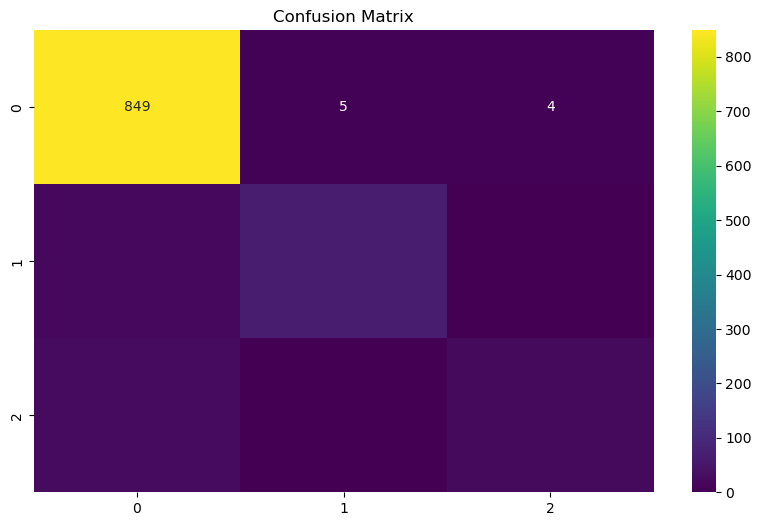

In [111]:
# şimdi de cobnfusion matriximizi görselleştirelim
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="viridis", fmt="d")
plt.title("Confusion Matrix")
plt.show()

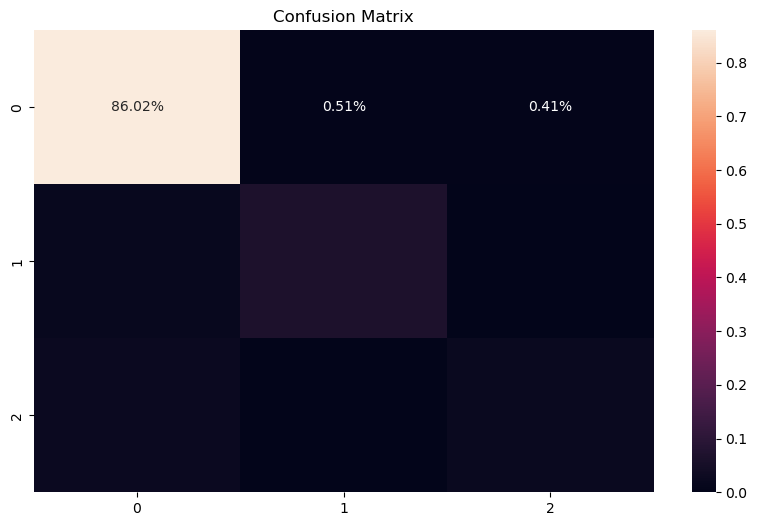

In [112]:
# şimdi de cobnfusion matriximizi görselleştirelim
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%'"")
plt.title("Confusion Matrix")
plt.show()

In [113]:
import joblib
joblib.dump(model, "modell.pkl")

['modell.pkl']

### RFE

In [114]:
from sklearn.feature_selection import RFE
selector = RFE(estimator=LogisticRegression(), n_features_to_select=7)
selector = selector.fit(X_train, y_train) 

In [115]:
print(selector.support_)
print(selector.ranking_)

[False  True False  True False False False False  True  True  True  True
 False  True]
[8 1 7 1 2 6 3 4 1 1 1 1 5 1]


In [116]:
X.columns[selector.support_]


Index(['on_thyroxine', 'thyroid_surgery', 'psych', 'TSH', 'T3', 'TT4', 'FTI'], dtype='object')

In [117]:
# burada selector.support_ içinde ki öznitelikleri yeni "newModel" değişkeni oluşturup atacağız
selectedFeautures = list(X.columns[selector.support_])
selectedFeautures.append("target")

In [118]:
newModel = data[selectedFeautures]

In [119]:
newModel

,on_thyroxine,thyroid_surgery,psych,TSH,T3,TT4,FTI,target
19,f,f,f,1.50,2.4,90.0,85.0,Negative
21,f,f,f,1.20,2.3,104.0,96.0,Negative
22,f,f,f,5.90,2.1,88.0,105.0,Negative
23,f,f,f,0.05,2.4,107.0,95.0,Negative
27,f,f,f,0.05,2.1,93.0,106.0,Negative
...,...,...,...,...,...,...,...,...
9129,f,f,f,0.73,1.8,85.0,94.0,Negative
9130,t,f,f,4.10,2.1,135.0,113.0,Negative
9134,f,f,f,53.00,1.0,49.0,39.0,Hypothyroid
9137,t,f,f,2.30,1.3,59.0,81.0,Negative


In [120]:
newModel["target"].value_counts()

target
Negative        4293
Hypothyroid      461
Hyperthyroid     181
Name: count, dtype: int64

In [121]:
#mapping = {"f":0, "t":1, "Negative":0, "Hypothyroid":1, "Hyperthyroid":2}

newModel.replace(to_replace="f", value=0, inplace=True)
newModel.replace(to_replace="t", value=1, inplace=True)
newModel.head()

C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3570363816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newModel.replace(to_replace="f", value=0, inplace=True)
C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\3570363816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newModel.replace(to_replace="t", value=1, inplace=True)


,on_thyroxine,thyroid_surgery,psych,TSH,T3,TT4,FTI,target
19,0,0,0,1.50,2.4,90.0,85.0,Negative
21,0,0,0,1.20,2.3,104.0,96.0,Negative
22,0,0,0,5.90,2.1,88.0,105.0,Negative
23,0,0,0,0.05,2.4,107.0,95.0,Negative
27,0,0,0,0.05,2.1,93.0,106.0,Negative


In [122]:
mapping = {"Negative":0, "Hypothyroid":1, "Hyperthyroid":2}
newModel["target"] = newModel["target"].map(mapping)

C:\Users\Veli\AppData\Local\Temp\ipykernel_17132\32735311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newModel["target"] = newModel["target"].map(mapping)


In [123]:
newModel

,on_thyroxine,thyroid_surgery,psych,TSH,T3,TT4,FTI,target
19,0,0,0,1.50,2.4,90.0,85.0,0
21,0,0,0,1.20,2.3,104.0,96.0,0
22,0,0,0,5.90,2.1,88.0,105.0,0
23,0,0,0,0.05,2.4,107.0,95.0,0
27,0,0,0,0.05,2.1,93.0,106.0,0
...,...,...,...,...,...,...,...,...
9129,0,0,0,0.73,1.8,85.0,94.0,0
9130,1,0,0,4.10,2.1,135.0,113.0,0
9134,0,0,0,53.00,1.0,49.0,39.0,1
9137,1,0,0,2.30,1.3,59.0,81.0,0


In [124]:
newModel.isna().sum()

on_thyroxine          0
thyroid_surgery       0
psych                 0
TSH                   0
T3                    0
TT4                   0
FTI                   0
target             1046
dtype: int64

In [125]:
df["target"] = df["target"].dropna()

In [126]:
newModel = newModel.dropna()

In [127]:
# Şimdide de modelimizi eğitelim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X = newModel.drop("target", axis=1)
y = newModel["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [128]:
# modelimizi eğitelim
newModelRFE = LogisticRegression()
newModelRFE.fit(X_train, y_train)

LogisticRegression()

In [129]:
# modelimizi test edelim
y_pred = newModelRFE.predict(X_test)

# modelimizin başarımını ölçelim
print("Modelimizin Doğruluk Oranı: ", accuracy_score(y_test, y_pred))
print("Modelimizin Karmaşıklık Matrisi: ")
print(confusion_matrix(y_test, y_pred))
print("Modelimizin Sınıflandırma Raporu: ")
print(classification_report(y_test, y_pred))


Modelimizin Doğruluk Oranı:  0.9513677811550152
Modelimizin Karmaşıklık Matrisi: 
[[849   6   3]
 [ 18  64   0]
 [ 21   0  26]]
Modelimizin Sınıflandırma Raporu: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       858
           1       0.91      0.78      0.84        82
           2       0.90      0.55      0.68        47

    accuracy                           0.95       987
   macro avg       0.92      0.77      0.83       987
weighted avg       0.95      0.95      0.95       987



In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       858
           1       0.91      0.78      0.84        82
           2       0.90      0.55      0.68        47

    accuracy                           0.95       987
   macro avg       0.92      0.77      0.83       987
weighted avg       0.95      0.95      0.95       987



In [131]:
# başarı metriklerine bakalım
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Modelimizin Doğruluk Oranı: ", accuracy_score(y_test, y_pred))
print("Modelimizin Hassasiyet Değeri: ", precision_score(y_test, y_pred, average="weighted"))

print("Modelimizin Duyarlılık Değeri: ", recall_score(y_test, y_pred, average="weighted"))
print("Modelimizin F1 Skoru: ", f1_score(y_test, y_pred, average="weighted"))


Modelimizin Doğruluk Oranı:  0.9513677811550152
Modelimizin Hassasiyet Değeri:  0.9497739890308803
Modelimizin Duyarlılık Değeri:  0.9513677811550152
Modelimizin F1 Skoru:  0.9479461980241237


In [132]:
joblib.dump(newModel, "newModel.pkl")

['newModel.pkl']